In [90]:
%%capture
%run ProjectWebScraping.ipynb

In [91]:
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install gensim

In [92]:
from nltk import FreqDist
from gensim.corpora.dictionary import Dictionary
from IPython.display import Markdown as md
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline

In [93]:
lemmatized_tokens_list = []
lemmatized_tokens_list.append(lemmatized_tokens_dem_platform_2016)
lemmatized_tokens_list.append(lemmatized_tokens_rep_platform_2016)
lemmatized_tokens_list.append(lemmatized_tokens_dem_debate_2016)
lemmatized_tokens_list.append(lemmatized_tokens_rep_debate_2016)
lemmatized_tokens_list.append(lemmatized_tokens_dem_platform_1980)
lemmatized_tokens_list.append(lemmatized_tokens_rep_platform_1980)
lemmatized_tokens_list.append(lemmatized_tokens_dem_debate_1980)
lemmatized_tokens_list.append(lemmatized_tokens_rep_debate_1980)

In [94]:
tokens_list = []
tokens_list.append(tokens_dem_platform_2016)
tokens_list.append(tokens_rep_platform_2016)
tokens_list.append(tokens_dem_debate_2016)
tokens_list.append(tokens_rep_debate_2016)
tokens_list.append(tokens_dem_platform_1980)
tokens_list.append(tokens_rep_platform_1980)
tokens_list.append(tokens_dem_debate_1980)
tokens_list.append(tokens_rep_debate_1980)

In [95]:
nltk.download('averaged_perceptron_tagger')
tagged_dem_platform_2016 = nltk.pos_tag(lemmatized_tokens_dem_platform_2016)
tagged_rep_platform_2016 = nltk.pos_tag(lemmatized_tokens_rep_platform_2016)
tagged_dem_debate_2016 = nltk.pos_tag(lemmatized_tokens_dem_debate_2016)
tagged_rep_debate_2016 = nltk.pos_tag(lemmatized_tokens_rep_debate_2016)
tagged_dem_platform_1980 = nltk.pos_tag(lemmatized_tokens_dem_platform_1980)
tagged_rep_platform_1980 = nltk.pos_tag(lemmatized_tokens_rep_platform_1980)
tagged_dem_debate_1980 = nltk.pos_tag(lemmatized_tokens_dem_debate_1980)
tagged_rep_debate_1980 = nltk.pos_tag(lemmatized_tokens_rep_debate_1980)

tagged_list = []
tagged_list.append(tagged_dem_platform_2016)
tagged_list.append(tagged_rep_platform_2016)
tagged_list.append(tagged_dem_debate_2016)
tagged_list.append(tagged_rep_debate_2016)
tagged_list.append(tagged_dem_platform_1980)
tagged_list.append(tagged_rep_platform_1980)
tagged_list.append(tagged_dem_debate_1980)
tagged_list.append(tagged_rep_debate_1980)

In [96]:
dict_lemmatized_tokens_list = []
for i in range(len(lemmatized_tokens_list)):
    dict_lemmatized_tokens_list.append(Dictionary([lemmatized_tokens_list[i]]))
    
bow_lemmatized_tokens_list = []
bow_lemmatized_tokens_list_ids = []
bow_lemmatized_tokens_list_counts = []
for i in range(len(lemmatized_tokens_list)):
    bow_lemmatized_tokens_list.append(dict_lemmatized_tokens_list[i].doc2bow(lemmatized_tokens_list[i]))
    bow_lemmatized_tokens_list[i] = sorted(bow_lemmatized_tokens_list[i], key=lambda x: x[1], reverse=True)
    term_ids, counts = zip(*bow_lemmatized_tokens_list[i])
    bow_lemmatized_tokens_list_ids.append(term_ids)
    bow_lemmatized_tokens_list_counts.append(counts)

## Most often used words in political platforms and debates

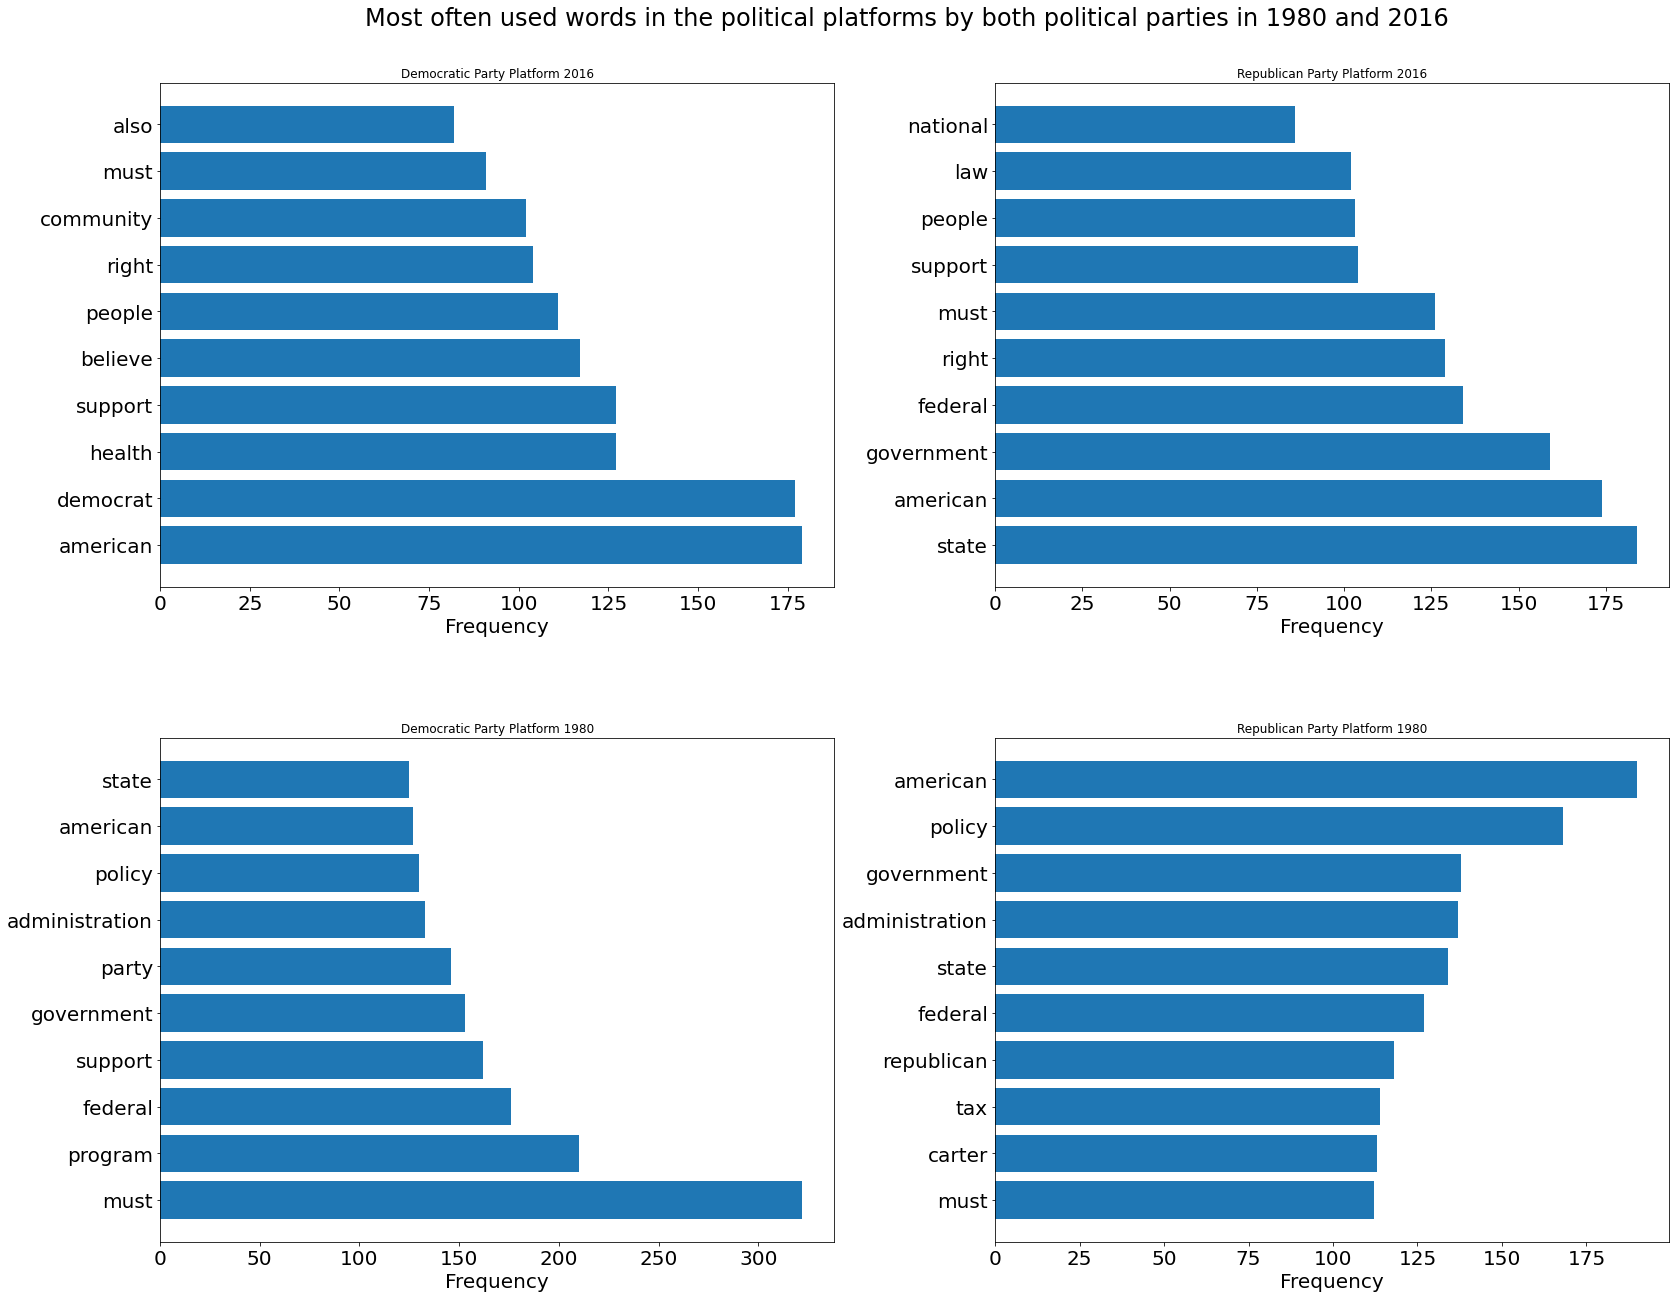

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
plt.gca().invert_yaxis()

fig.tight_layout(pad=13.0)
fig.suptitle('Most often used words in the political platforms by both political parties in 1980 and 2016', fontsize=24, y=0.96)

for item in ([ax[0][0].title, ax[0][0].xaxis.label, ax[0][0].yaxis.label] + ax[0][0].get_xticklabels() + ax[0][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[0][1].title, ax[0][1].xaxis.label, ax[0][1].yaxis.label] + ax[0][1].get_xticklabels() + ax[0][1].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][0].title, ax[1][0].xaxis.label, ax[1][0].yaxis.label] + ax[1][0].get_xticklabels() + ax[1][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][1].title, ax[1][1].xaxis.label, ax[1][1].yaxis.label] + ax[1][1].get_xticklabels() + ax[1][1].get_yticklabels()):
        item.set_fontsize(20)
        
for i in range(4):
    if i == 0:
        ax[0][0].barh([dict_lemmatized_tokens_list[0][id] for id in bow_lemmatized_tokens_list_ids[0][:10]], 
                      bow_lemmatized_tokens_list_counts[0][:10])
        ax[0][0].set_xlabel('Frequency')
        ax[0][0].set_title('Democratic Party Platform 2016')
    if i == 1:
        ax[0][1].barh([dict_lemmatized_tokens_list[1][id] for id in bow_lemmatized_tokens_list_ids[1][:10]], 
                      bow_lemmatized_tokens_list_counts[1][:10])
        ax[0][1].set_xlabel('Frequency')
        ax[0][1].set_title('Republican Party Platform 2016')
    if i == 2:
        ax[1][0].barh([dict_lemmatized_tokens_list[4][id] for id in bow_lemmatized_tokens_list_ids[4][:10]],
                      bow_lemmatized_tokens_list_counts[4][:10])
        ax[1][0].set_xlabel('Frequency')
        ax[1][0].set_title('Democratic Party Platform 1980')
    if i == 3:
        ax[1][1].barh([dict_lemmatized_tokens_list[5][id] for id in bow_lemmatized_tokens_list_ids[5][:10]],
                      bow_lemmatized_tokens_list_counts[5][:10])
        ax[1][1].set_xlabel('Frequency')
        ax[1][1].set_title('Republican Party Platform 1980')
    
plt.show()

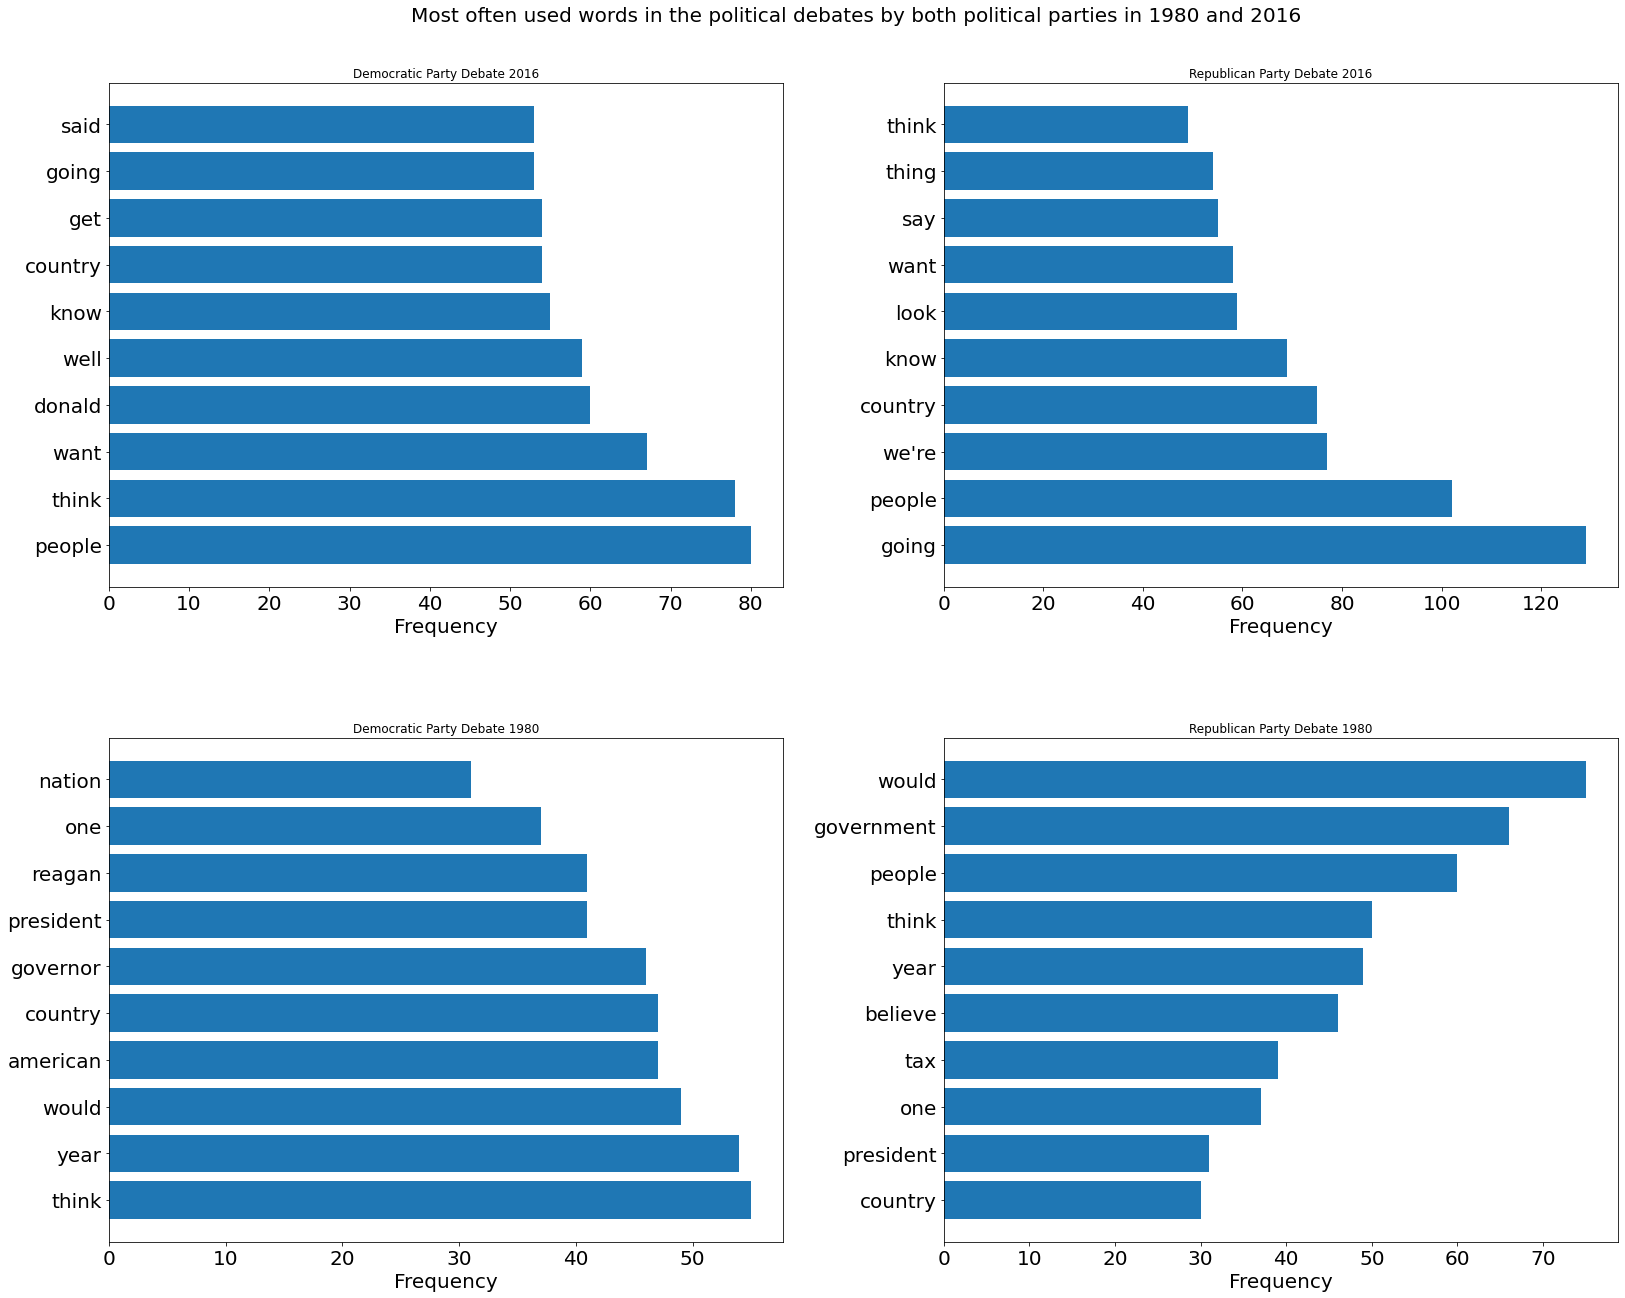

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
plt.gca().invert_yaxis()

fig.tight_layout(pad=13.0)
fig.suptitle('Most often used words in the political debates by both political parties in 1980 and 2016', fontsize=20, y=0.96)

for item in ([ax[0][0].title, ax[0][0].xaxis.label, ax[0][0].yaxis.label] + ax[0][0].get_xticklabels() + ax[0][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[0][1].title, ax[0][1].xaxis.label, ax[0][1].yaxis.label] + ax[0][1].get_xticklabels() + ax[0][1].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][0].title, ax[1][0].xaxis.label, ax[1][0].yaxis.label] + ax[1][0].get_xticklabels() + ax[1][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][1].title, ax[1][1].xaxis.label, ax[1][1].yaxis.label] + ax[1][1].get_xticklabels() + ax[1][1].get_yticklabels()):
        item.set_fontsize(20)
        
for i in range(4):
    if i == 0:
        ax[0][0].barh([dict_lemmatized_tokens_list[2][id] for id in bow_lemmatized_tokens_list_ids[2][:10]], 
                      bow_lemmatized_tokens_list_counts[2][:10])
        ax[0][0].set_xlabel('Frequency')
        ax[0][0].set_title('Democratic Party Debate 2016')
    if i == 1:
        ax[0][1].barh([dict_lemmatized_tokens_list[3][id] for id in bow_lemmatized_tokens_list_ids[3][:10]], 
                      bow_lemmatized_tokens_list_counts[3][:10])
        ax[0][1].set_xlabel('Frequency')
        ax[0][1].set_title('Republican Party Debate 2016')
    if i == 2:
        ax[1][0].barh([dict_lemmatized_tokens_list[6][id] for id in bow_lemmatized_tokens_list_ids[6][:10]],
                      bow_lemmatized_tokens_list_counts[6][:10])
        ax[1][0].set_xlabel('Frequency')
        ax[1][0].set_title('Democratic Party Debate 1980')
    if i == 3:
        ax[1][1].barh([dict_lemmatized_tokens_list[7][id] for id in bow_lemmatized_tokens_list_ids[7][:10]],
                      bow_lemmatized_tokens_list_counts[7][:10])
        ax[1][1].set_xlabel('Frequency')
        ax[1][1].set_title('Republican Party Debate 1980')
    
plt.show()

## Text richness and diversity

In [99]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [100]:
lexical_diversity_list = []
for i in range(len(tokens_list)):
    lexical_diversity_list.append(round(lexical_diversity(tokens_list[i]), 4))

md('''| Text | Ratio | 
| :- | -: |
| Democratic Party Platform 2016| {} |
| Republican Party Platform 2016| {} |
| Democratic Party Debate 2016| {} |
| Republican Party Debate 2016| {} |
| Democratic Party Platform 1980| {} |
| Republican Party Platform 1980| {} |
| Democratic Party Debate 1980| {} |
| Republican Party Debate 1980| {} |'''.format(lexical_diversity_list[0], lexical_diversity_list[1], 
                                   lexical_diversity_list[2], lexical_diversity_list[3],
                                   lexical_diversity_list[4], lexical_diversity_list[5],
                                   lexical_diversity_list[6], lexical_diversity_list[7]))

| Text | Ratio | 
| :- | -: |
| Democratic Party Platform 2016| 0.2526 |
| Republican Party Platform 2016| 0.2633 |
| Democratic Party Debate 2016| 0.2978 |
| Republican Party Debate 2016| 0.2284 |
| Democratic Party Platform 1980| 0.2047 |
| Republican Party Platform 1980| 0.2374 |
| Democratic Party Debate 1980| 0.3648 |
| Republican Party Debate 1980| 0.3488 |

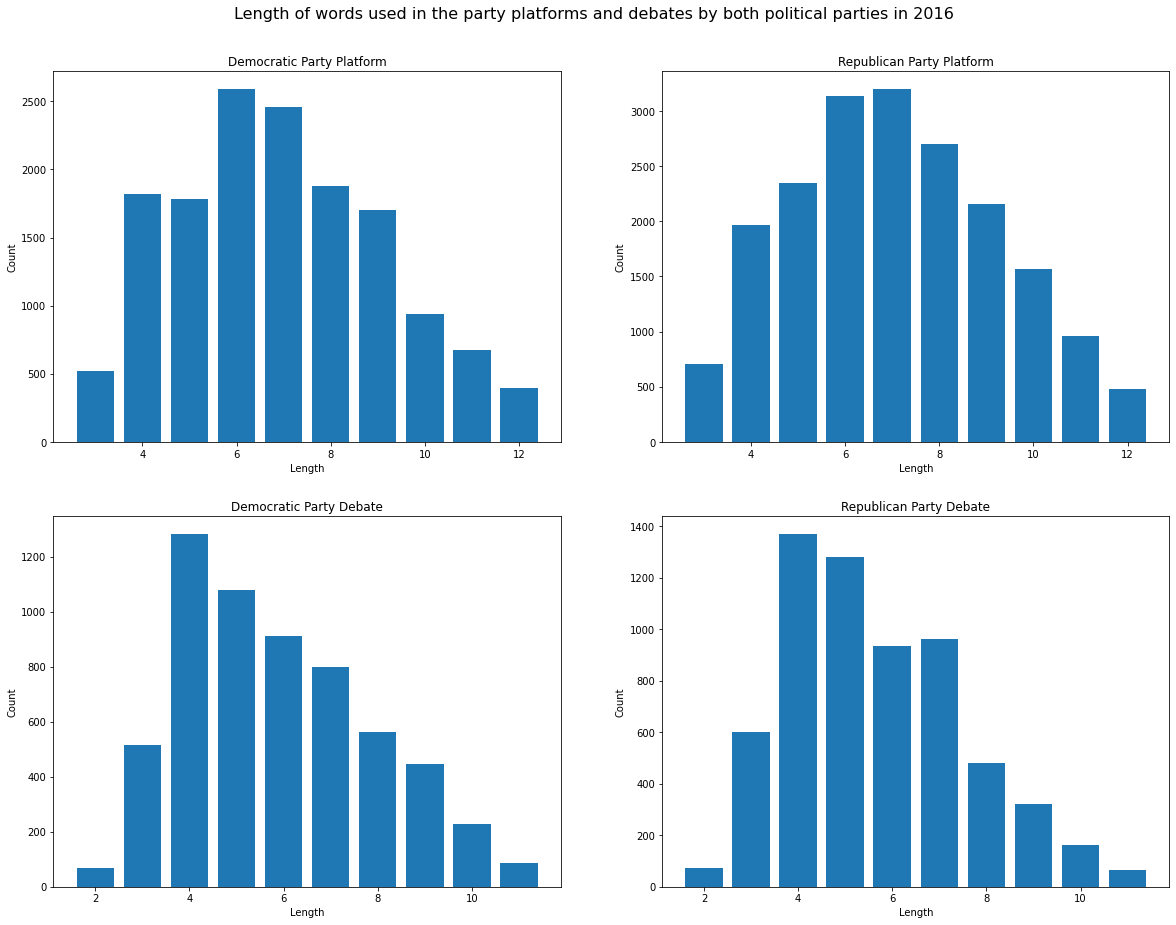

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Length of words used in the party platforms and debates by both political parties in 2016', fontsize=16, y=0.94)
for i in range(4):
    freq_dist = FreqDist(len(char) for char in tokens_list[i])
    freq_list = freq_dist.most_common(10)
    freq_x = []
    freq_y = []
    for j in range(len(freq_list)):
        freq_x.append(freq_list[j][0])
        freq_y.append(freq_list[j][1])   
    if i == 0:
        ax[0][0].bar(freq_x, freq_y)
        ax[0][0].set_xlabel('Length')
        ax[0][0].set_ylabel('Count')
        ax[0][0].set_title('Democratic Party Platform')
    if i == 1:
        ax[0][1].bar(freq_x, freq_y)
        ax[0][1].set_xlabel('Length')
        ax[0][1].set_ylabel('Count')
        ax[0][1].set_title('Republican Party Platform')
    if i == 2:
        ax[1][0].bar(freq_x, freq_y)
        ax[1][0].set_xlabel('Length')
        ax[1][0].set_ylabel('Count')
        ax[1][0].set_title('Democratic Party Debate')
    if i == 3:
        ax[1][1].bar(freq_x, freq_y)
        ax[1][1].set_xlabel('Length')
        ax[1][1].set_ylabel('Count')
        ax[1][1].set_title('Republican Party Debate')
    
plt.show()

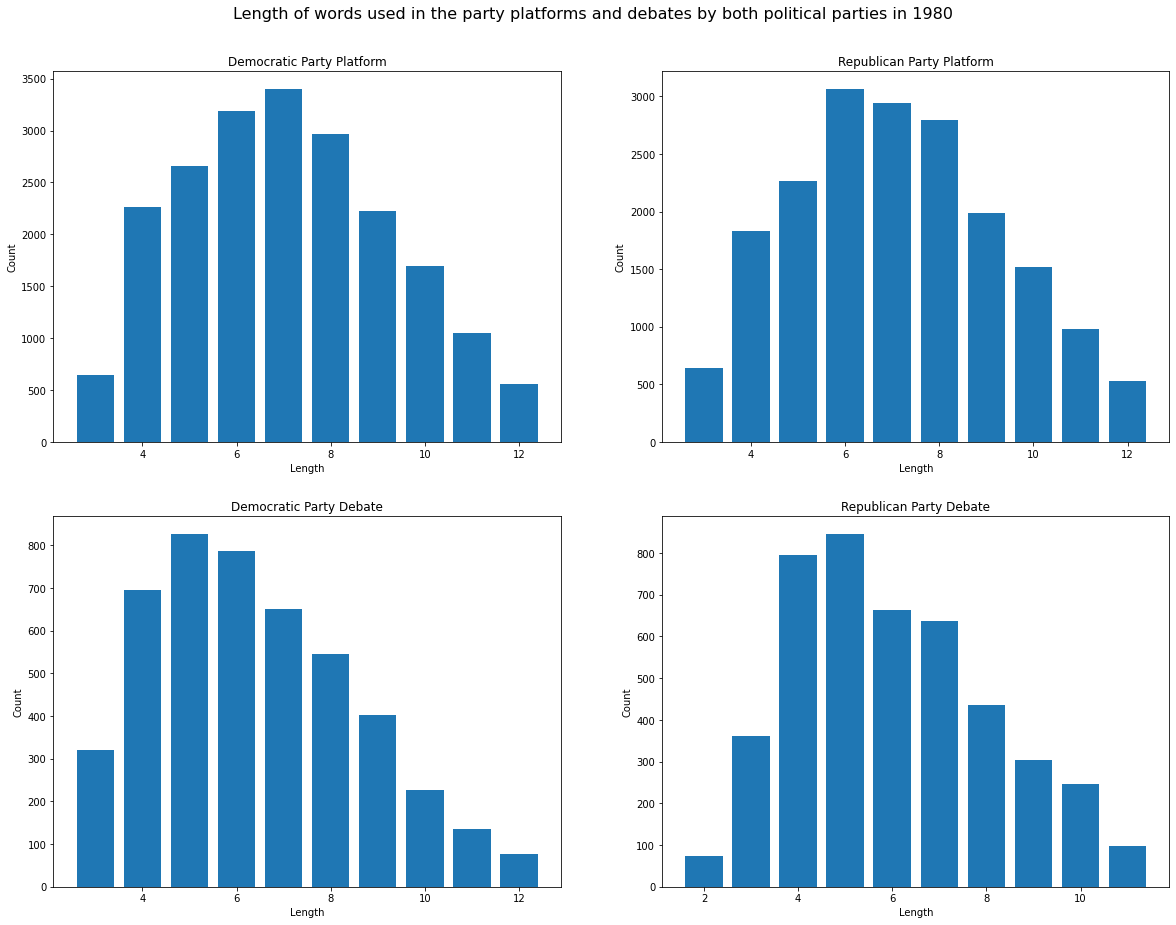

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Length of words used in the party platforms and debates by both political parties in 1980', 
             fontsize=16, y=0.94)
for i in range(4):
    freq_dist = FreqDist(len(char) for char in tokens_list[i + 4])
    freq_list = freq_dist.most_common(10)
    freq_x = []
    freq_y = []
    for j in range(len(freq_list)):
        freq_x.append(freq_list[j][0])
        freq_y.append(freq_list[j][1])   
    if i == 0:
        ax[0][0].bar(freq_x, freq_y)
        ax[0][0].set_xlabel('Length')
        ax[0][0].set_ylabel('Count')
        ax[0][0].set_title('Democratic Party Platform')
    if i == 1:
        ax[0][1].bar(freq_x, freq_y)
        ax[0][1].set_xlabel('Length')
        ax[0][1].set_ylabel('Count')
        ax[0][1].set_title('Republican Party Platform')
    if i == 2:
        ax[1][0].bar(freq_x, freq_y)
        ax[1][0].set_xlabel('Length')
        ax[1][0].set_ylabel('Count')
        ax[1][0].set_title('Democratic Party Debate')
    if i == 3:
        ax[1][1].bar(freq_x, freq_y)
        ax[1][1].set_xlabel('Length')
        ax[1][1].set_ylabel('Count')
        ax[1][1].set_title('Republican Party Debate')
    
plt.show()

In [103]:
count_nouns = []
count_verbs = []
count_adjectives = []
count_rest = []
for i in range(len(tagged_list)):
    counter_nouns = 0
    counter_verbs = 0
    counter_adjectives = 0
    counter_rest = 0
    for j in range(len(tagged_list[i])):
        if tagged_list[i][j][1] == 'NN' or tagged_list[i][j][1] == 'NN' or tagged_list[i][j][1] == 'NNS' or tagged_list[i][j][1] == 'NNPS':
            counter_nouns += 1
        elif tagged_list[i][j][1] == 'VB' or tagged_list[i][j][1] == 'VBG' or tagged_list[i][j][1] == 'VBD' or tagged_list[i][j][1] == 'VBN' or tagged_list[i][j][1] == 'VBP' or tagged_list[i][j][1] == 'VBZ':
            counter_verbs += 1
        elif tagged_list[i][j][1] == 'JJ' or tagged_list[i][j][1] == 'JJR' or tagged_list[i][j][1] == 'JJS':
            counter_adjectives += 1
        else:
            counter_rest += 1
    count_nouns.append(counter_nouns)
    count_verbs.append(counter_verbs)
    count_adjectives.append(counter_adjectives)
    count_rest.append(counter_rest)               

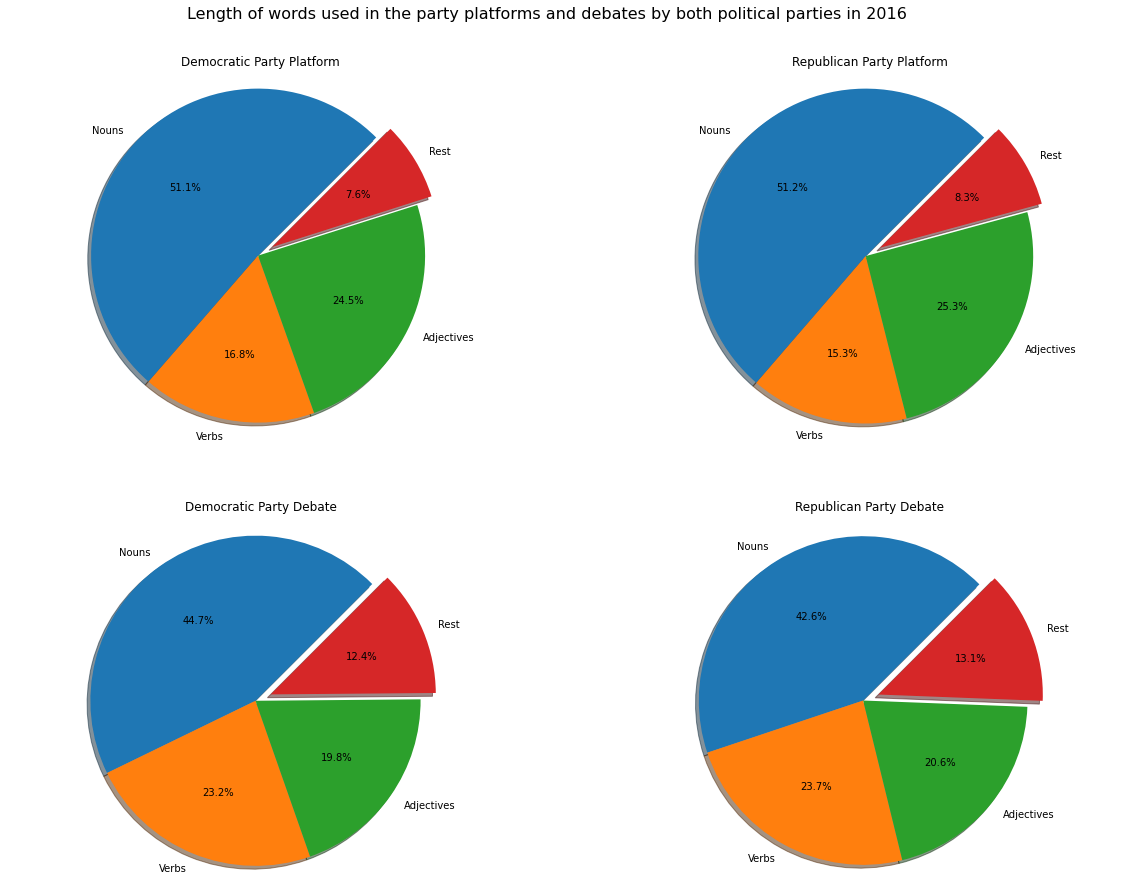

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Length of words used in the party platforms and debates by both political parties in 2016', 
             fontsize=16, y=0.94)

for i in range(4): 
    if i == 0:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[0], count_verbs[0], count_adjectives[0], count_rest[0]]
        explode = (0, 0, 0, 0.1)
        ax[0][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
        ax[0][0].axis('equal')
        ax[0][0].set_title('Democratic Party Platform')
    if i == 1:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[1], count_verbs[1], count_adjectives[1], count_rest[1]]
        explode = (0, 0, 0, 0.1)
        ax[0][1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
        ax[0][1].axis('equal')
        ax[0][1].set_title('Republican Party Platform')
    if i == 2:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[2], count_verbs[2], count_adjectives[2], count_rest[2]]
        explode = (0, 0, 0, 0.1)
        ax[1][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)  
        ax[1][0].axis('equal')
        ax[1][0].set_title('Democratic Party Debate')
    if i == 3:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[3], count_verbs[3], count_adjectives[3], count_rest[3]]
        explode = (0, 0, 0, 0.1)
        ax[1][1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
        ax[1][1].axis('equal')
        ax[1][1].set_title('Republican Party Debate')
    
plt.show()

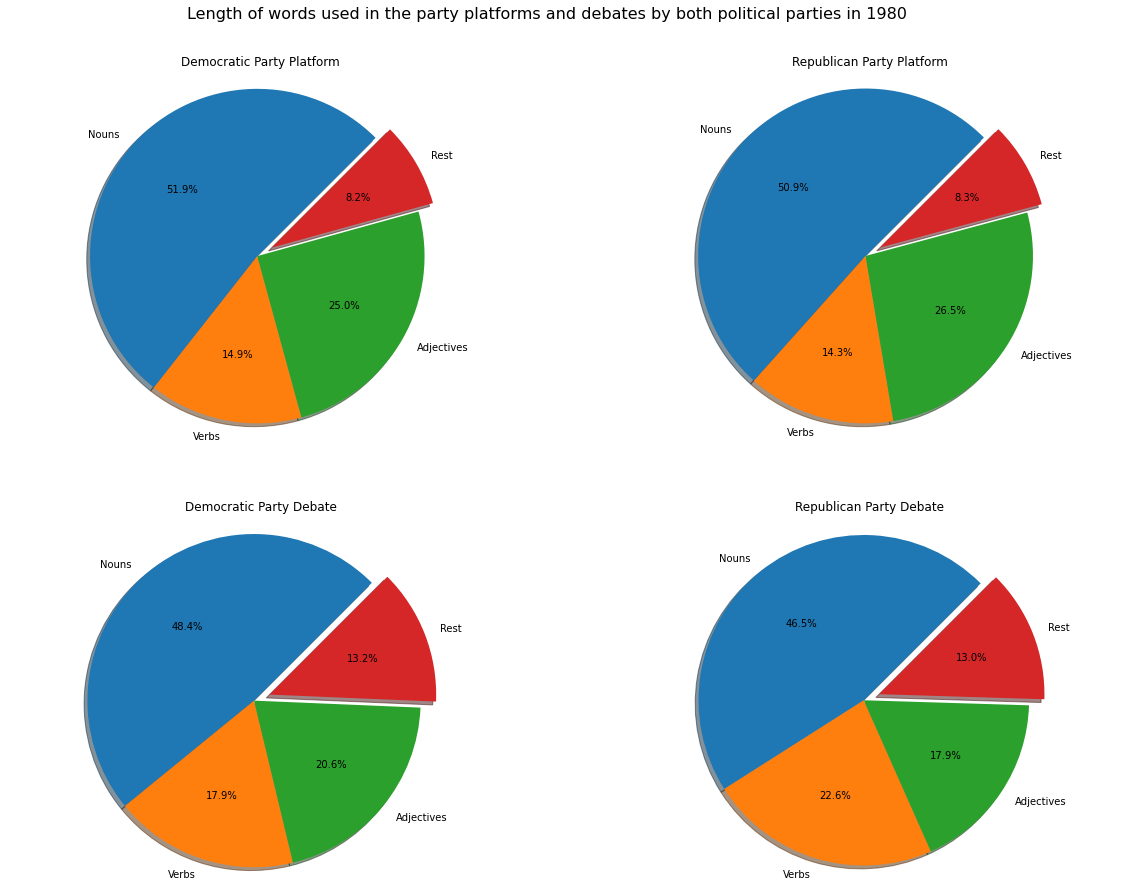

In [105]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Length of words used in the party platforms and debates by both political parties in 1980', 
             fontsize=16, y=0.94)

for i in range(4): 
    if i == 0:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[4], count_verbs[4], count_adjectives[4], count_rest[4]]
        explode = (0, 0, 0, 0.1)
        ax[0][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
        ax[0][0].axis('equal')
        ax[0][0].set_title('Democratic Party Platform')
    if i == 1:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[5], count_verbs[5], count_adjectives[5], count_rest[5]]
        explode = (0, 0, 0, 0.1)
        ax[0][1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
        ax[0][1].axis('equal')
        ax[0][1].set_title('Republican Party Platform')
    if i == 2:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[6], count_verbs[6], count_adjectives[6], count_rest[6]]
        explode = (0, 0, 0, 0.1)
        ax[1][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)  
        ax[1][0].axis('equal')
        ax[1][0].set_title('Democratic Party Debate')
    if i == 3:
        labels = 'Nouns', 'Verbs', 'Adjectives', 'Rest'
        sizes = [count_nouns[7], count_verbs[7], count_adjectives[7], count_rest[7]]
        explode = (0, 0, 0, 0.1)
        ax[1][1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
        ax[1][1].axis('equal')
        ax[1][1].set_title('Republican Party Debate')
    
plt.show()

## Lexical dispersion plots

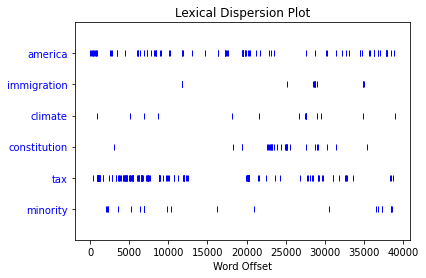

In [106]:
nltk.Text(lemmatized_tokens_rep_platform_1980 + lemmatized_tokens_rep_platform_2016).dispersion_plot(['america', 'immigration', 'climate', 'constitution', 'tax', 'minority'])

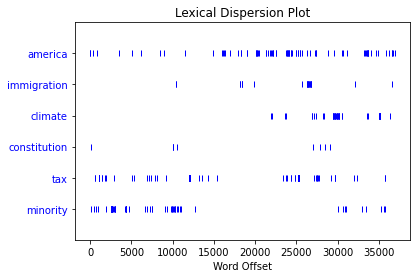

In [107]:
nltk.Text(lemmatized_tokens_dem_platform_1980 + lemmatized_tokens_dem_platform_2016).dispersion_plot(['america', 'immigration', 'climate', 'constitution', 'tax', 'minority'])

## Topic modeling

In [108]:
lemmatized_tokens_list_nouns = []
for i in range(len(tagged_list)):
    tmp_list = []
    for j in range(len(tagged_list[i])):
        tmp = tagged_list[i][j][1]
        tmp_word = tagged_list[i][j][0]
        if tmp == 'NN' or tmp == 'NNS' or tmp == 'NNP' or tmp == 'NNPS':
            tmp_list.append(tmp_word)
    lemmatized_tokens_list_nouns.append(tmp_list)

In [109]:
dict_lemmatized_tokens_list_nouns = []
for i in range(len(lemmatized_tokens_list_nouns)):
    dict_lemmatized_tokens_list_nouns.append(Dictionary([lemmatized_tokens_list_nouns[i]]))
    
bow_lemmatized_tokens_list_nouns = []
bow_lemmatized_tokens_list_ids_nouns = []
bow_lemmatized_tokens_list_counts_nouns = []
for i in range(len(lemmatized_tokens_list_nouns)):
    bow_lemmatized_tokens_list_nouns.append(dict_lemmatized_tokens_list_nouns[i].doc2bow(lemmatized_tokens_list_nouns[i]))
    bow_lemmatized_tokens_list_nouns[i] = sorted(bow_lemmatized_tokens_list_nouns[i], key=lambda x: x[1], reverse=True)
    term_ids, counts = zip(*bow_lemmatized_tokens_list_nouns[i])
    bow_lemmatized_tokens_list_ids_nouns.append(term_ids)
    bow_lemmatized_tokens_list_counts_nouns.append(counts)

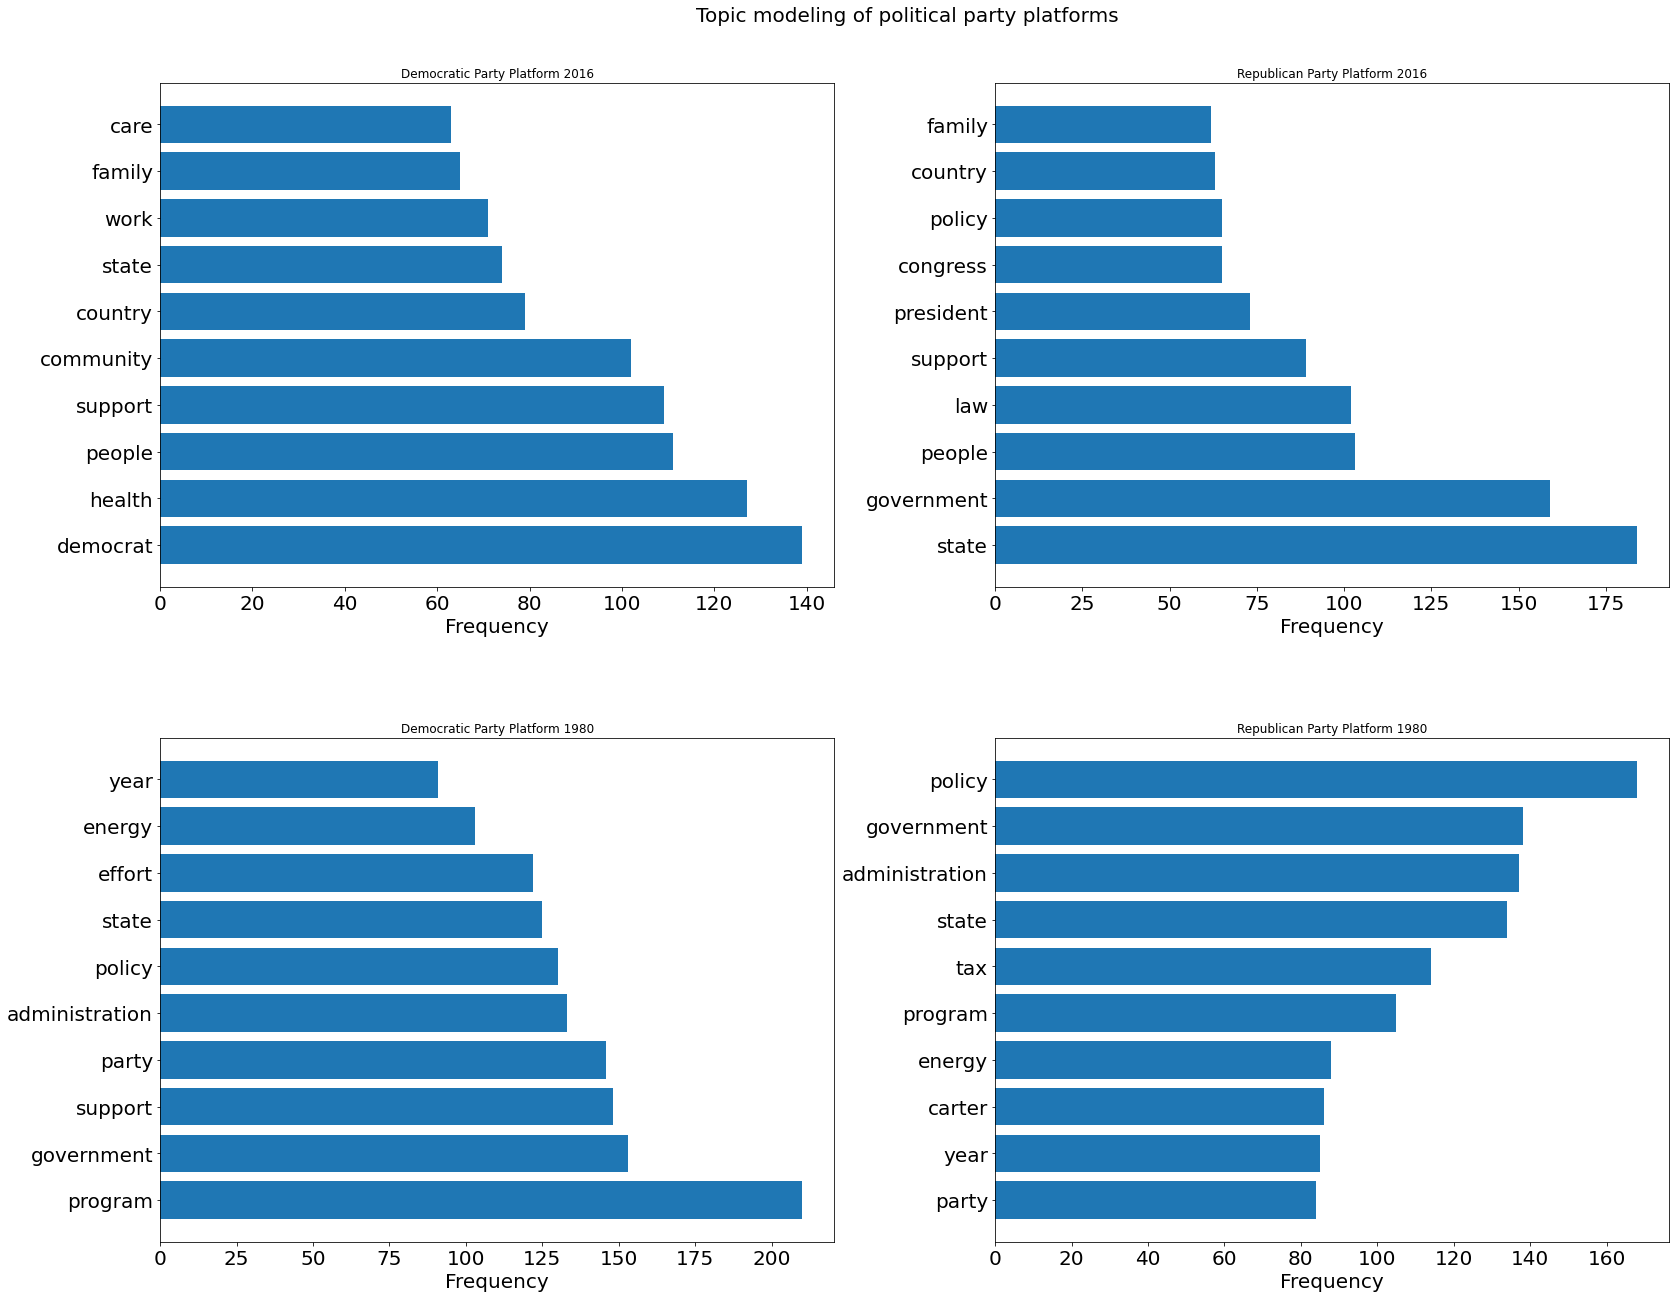

In [110]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
plt.gca().invert_yaxis()

fig.tight_layout(pad=13.0)
fig.suptitle('Topic modeling of political party platforms', fontsize=20, y=0.96)

for item in ([ax[0][0].title, ax[0][0].xaxis.label, ax[0][0].yaxis.label] + ax[0][0].get_xticklabels() + ax[0][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[0][1].title, ax[0][1].xaxis.label, ax[0][1].yaxis.label] + ax[0][1].get_xticklabels() + ax[0][1].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][0].title, ax[1][0].xaxis.label, ax[1][0].yaxis.label] + ax[1][0].get_xticklabels() + ax[1][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][1].title, ax[1][1].xaxis.label, ax[1][1].yaxis.label] + ax[1][1].get_xticklabels() + ax[1][1].get_yticklabels()):
        item.set_fontsize(20)
        
for i in range(4):
    if i == 0:
        ax[0][0].barh([dict_lemmatized_tokens_list_nouns[0][id] for id in bow_lemmatized_tokens_list_ids_nouns[0][:10]], 
                      bow_lemmatized_tokens_list_counts_nouns[0][:10])
        ax[0][0].set_xlabel('Frequency')
        ax[0][0].set_title('Democratic Party Platform 2016')
    if i == 1:
        ax[0][1].barh([dict_lemmatized_tokens_list_nouns[1][id] for id in bow_lemmatized_tokens_list_ids_nouns[1][:10]], 
                      bow_lemmatized_tokens_list_counts_nouns[1][:10])
        ax[0][1].set_xlabel('Frequency')
        ax[0][1].set_title('Republican Party Platform 2016')
    if i == 2:
        ax[1][0].barh([dict_lemmatized_tokens_list_nouns[4][id] for id in bow_lemmatized_tokens_list_ids_nouns[4][:10]],
                      bow_lemmatized_tokens_list_counts_nouns[4][:10])
        ax[1][0].set_xlabel('Frequency')
        ax[1][0].set_title('Democratic Party Platform 1980')
    if i == 3:
        ax[1][1].barh([dict_lemmatized_tokens_list_nouns[5][id] for id in bow_lemmatized_tokens_list_ids_nouns[5][:10]],
                      bow_lemmatized_tokens_list_counts_nouns[5][:10])
        ax[1][1].set_xlabel('Frequency')
        ax[1][1].set_title('Republican Party Platform 1980')
    
plt.show()

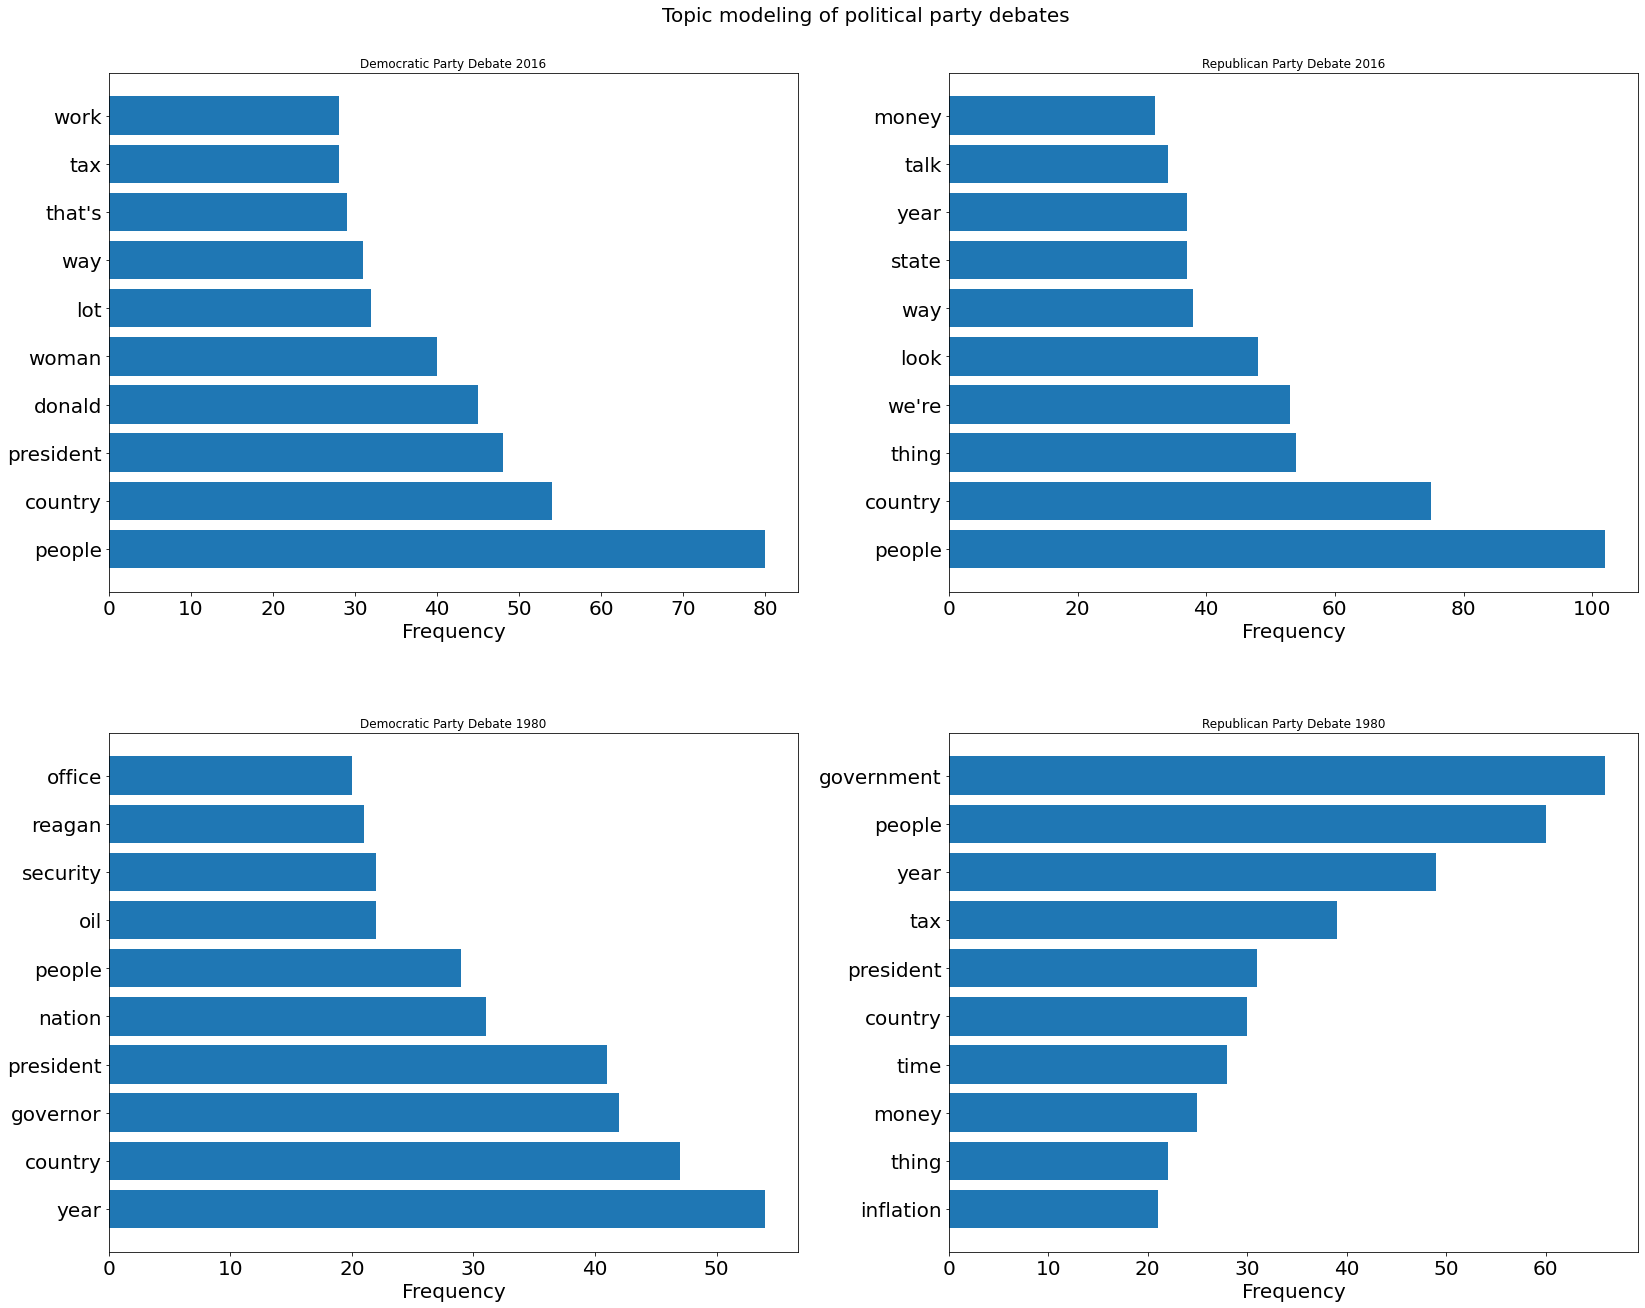

In [111]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
plt.gca().invert_yaxis()

fig.tight_layout(pad=12.0)
fig.suptitle('Topic modeling of political party debates', fontsize=20, y=0.96)

for item in ([ax[0][0].title, ax[0][0].xaxis.label, ax[0][0].yaxis.label] + ax[0][0].get_xticklabels() + ax[0][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[0][1].title, ax[0][1].xaxis.label, ax[0][1].yaxis.label] + ax[0][1].get_xticklabels() + ax[0][1].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][0].title, ax[1][0].xaxis.label, ax[1][0].yaxis.label] + ax[1][0].get_xticklabels() + ax[1][0].get_yticklabels()):
        item.set_fontsize(20)
for item in ([ax[1][1].title, ax[1][1].xaxis.label, ax[1][1].yaxis.label] + ax[1][1].get_xticklabels() + ax[1][1].get_yticklabels()):
        item.set_fontsize(20)
        
for i in range(4):
    if i == 0:
        ax[0][0].barh([dict_lemmatized_tokens_list_nouns[2][id] for id in bow_lemmatized_tokens_list_ids_nouns[2][:10]], 
                      bow_lemmatized_tokens_list_counts_nouns[2][:10])
        ax[0][0].set_xlabel('Frequency')
        ax[0][0].set_title('Democratic Party Debate 2016')
    if i == 1:
        ax[0][1].barh([dict_lemmatized_tokens_list_nouns[3][id] for id in bow_lemmatized_tokens_list_ids_nouns[3][:10]], 
                      bow_lemmatized_tokens_list_counts_nouns[3][:10])
        ax[0][1].set_xlabel('Frequency')
        ax[0][1].set_title('Republican Party Debate 2016')
    if i == 2:
        ax[1][0].barh([dict_lemmatized_tokens_list_nouns[6][id] for id in bow_lemmatized_tokens_list_ids_nouns[6][:10]],
                      bow_lemmatized_tokens_list_counts_nouns[6][:10])
        ax[1][0].set_xlabel('Frequency')
        ax[1][0].set_title('Democratic Party Debate 1980')
    if i == 3:
        ax[1][1].barh([dict_lemmatized_tokens_list_nouns[7][id] for id in bow_lemmatized_tokens_list_ids_nouns[7][:10]],
                      bow_lemmatized_tokens_list_counts_nouns[7][:10])
        ax[1][1].set_xlabel('Frequency')
        ax[1][1].set_title('Republican Party Debate 1980')
    
plt.show()

## Collocations

In [112]:
collocations_list = []
for i in range(len(tokens_list)):
    list_of_collocations = []
    for j in range(len(nltk.Text(tokens_dem_platform_2016).collocation_list())):
        collocation = ' '.join(nltk.Text(tokens_list[i]).collocation_list()[j])
        list_of_collocations.append(collocation)
    collocations_list.append(list_of_collocations)

In [113]:
md('''| Democratic Party Platform 2016 | Republican Party Platform 2016 |  Democratic Party Platform 1980 | Republican Party Platform 1980 |
| :- | -: | :- | -: |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
'''.format(collocations_list[0][0], collocations_list[1][0], collocations_list[4][0], collocations_list[5][0],
          collocations_list[0][1], collocations_list[1][1], collocations_list[4][1], collocations_list[5][1],
          collocations_list[0][2], collocations_list[1][2], collocations_list[4][2], collocations_list[5][2],
          collocations_list[0][3], collocations_list[1][3], collocations_list[4][3], collocations_list[5][3],
          collocations_list[0][4], collocations_list[1][4], collocations_list[4][4], collocations_list[5][4],
          collocations_list[0][5], collocations_list[1][5], collocations_list[4][5], collocations_list[5][5],
          collocations_list[0][6], collocations_list[1][6], collocations_list[4][6], collocations_list[5][6],
          collocations_list[0][7], collocations_list[1][7], collocations_list[4][7], collocations_list[5][7],
          collocations_list[0][8], collocations_list[1][8], collocations_list[4][8], collocations_list[5][8],
          collocations_list[0][9], collocations_list[1][9], collocations_list[4][9], collocations_list[5][9]))

| Democratic Party Platform 2016 | Republican Party Platform 2016 |  Democratic Party Platform 1980 | Republican Party Platform 1980 |
| :- | -: | :- | -: |
| <center>united states</center> | <center>united states</center> | <center>united states</center> | <center>united states</center> |
| <center>health care</center> | <center>middle east</center> | <center>human rights</center> | <center>carter administration</center> |
| <center>donald trump</center> | <center>national security</center> | <center>four years</center> | <center>soviet union</center> |
| <center>climate change</center> | <center>farmers ranchers</center> | <center>state local</center> | <center>economic growth</center> |
| <center>clean energy</center> | <center>private sector</center> | <center>federal government</center> | <center>tax rates</center> |
| <center>democrats believe</center> | <center>current administration's</center> | <center>middle east</center> | <center>foreign policy</center> |
| <center>middle class</center> | <center>economic growth</center> | <center>must continue</center> | <center>small business</center> |
| <center>president obama's</center> | <center>federal government</center> | <center>health care</center> | <center>armed forces</center> |
| <center>wall street</center> | <center>intellectual property</center> | <center>soviet union</center> | <center>four years</center> |
| <center>good-paying jobs</center> | <center>rule law</center> | <center>civil rights</center> | <center>health care</center> |


In [114]:
md('''| Democratic Party Platform 2016 | Republican Party Platform 2016 |  Democratic Party Platform 1980 | Republican Party Platform 1980 |
| :- | -: | :- | -: |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
| <center>{}</center> | <center>{}</center> | <center>{}</center> | <center>{}</center> |
'''.format(collocations_list[2][0], collocations_list[3][0], collocations_list[6][0], collocations_list[7][0],
          collocations_list[2][1], collocations_list[3][1], collocations_list[6][1], collocations_list[7][1],
          collocations_list[2][2], collocations_list[3][2], collocations_list[6][2], collocations_list[7][2],
          collocations_list[2][3], collocations_list[3][3], collocations_list[6][3], collocations_list[7][3],
          collocations_list[2][4], collocations_list[3][4], collocations_list[6][4], collocations_list[7][4],
          collocations_list[2][5], collocations_list[3][5], collocations_list[6][5], collocations_list[7][5],
          collocations_list[2][6], collocations_list[3][6], collocations_list[6][6], collocations_list[7][6],
          collocations_list[2][7], collocations_list[3][7], collocations_list[6][7], collocations_list[7][7],
          collocations_list[2][8], collocations_list[3][8], collocations_list[6][8], collocations_list[7][8],
          collocations_list[2][9], collocations_list[3][9], collocations_list[6][9], collocations_list[7][9]))

| Democratic Party Platform 2016 | Republican Party Platform 2016 |  Democratic Party Platform 1980 | Republican Party Platform 1980 |
| :- | -: | :- | -: |
| <center>supreme court</center> | <center>we're going</center> | <center>governor reagan</center> | <center>social security</center> |
| <center>united states</center> | <center>united states</center> | <center>social security</center> | <center>years ago</center> |
| <center>we're going</center> | <center>hillary clinton</center> | <center>american people</center> | <center>soviet union</center> |
| <center>second amendment</center> | <center>inner cities</center> | <center>oval office</center> | <center>united states</center> |
| <center>we've got</center> | <center>second amendment</center> | <center>tax cut</center> | <center>would like</center> |
| <center>secretary state</center> | <center>take look</center> | <center>soviet union</center> | <center>federal government</center> |
| <center>tax cuts</center> | <center>bernie sanders</center> | <center>united states</center> | <center>tax increase</center> |
| <center>president obama</center> | <center>make america</center> | <center>nuclear weapons</center> | <center>business industry</center> |
| <center>affordable care</center> | <center>bad judgment</center> | <center>minimum wage</center> | <center>arms limitation</center> |
| <center>make sure</center> | <center>carried interest</center> | <center>health insurance</center> | <center>misery index</center> |


## Tagging

In [115]:
nltk.download('averaged_perceptron_tagger')
tagged_dem_debate_1980 = nltk.pos_tag(tokens_dem_debate_1980)

In [116]:
patterns= """mychunk:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = nltk.RegexpParser(patterns)
output = chunker.parse(tagged_dem_debate_1980)
print("After Chunking",output)

After Chunking (S
  yes/RB
  (mychunk mr/NN stone/NN i've/JJ)
  make/VB
  (mychunk thousands/NNS decisions/NNS)
  since/IN
  (mychunk i've/NN president/NN)
  serving/VBG
  (mychunk oval/JJ)
  (mychunk office/NN)
  one/CD
  (mychunk decisions/NNS)
  affect/VBP
  (mychunk future/JJ)
  (mychunk country/NN learned/VBD process/JJ)
  think/VBP
  i'm/RB
  much/RB
  wiser/RBR
  (mychunk experienced/JJ)
  (mychunk man/NN debated/VBD)
  (mychunk years/NNS)
  ago/IN
  (mychunk president/NN ford/NN i've/NN)
  also/RB
  (mychunk learned/VBD simple/JJ)
  (mychunk answers/NNS complicated/VBD)
  (mychunk questions/NNS)
  h/VBP
  (mychunk l/JJ)
  (mychunk mencken/NN said/VBD)
  every/DT
  (mychunk problem/NN there's/NN simple/NN answer/NN)
  would/MD
  neat/VB
  (mychunk plausible/JJ wrong/JJ)
  (mychunk fact/NN nation/NN years/NNS became/VBD)
  (mychunk president/NN military/JJ)
  (mychunk strength/NN decreased/VBD)
  seven/CD
  eight/CD
  (mychunk years/NNS budget/NN commitments/NNS defense/NN went/V

In [117]:
tagged_dem_platform_2016= nltk.pos_tag(tokens_dem_platform_2016)

tagged_rep_platform_2016= nltk.pos_tag(tokens_rep_platform_2016)

tagged_dem_debate_2016= nltk.pos_tag(tokens_dem_debate_2016)

tagged_rep_debate_2016=nltk.pos_tag(tokens_rep_debate_2016)

tagged_rep_platform_1980= nltk.pos_tag(tokens_rep_platform_1980)

tagged_rep_platform_1980

[('adopted', 'VBN'),
 ('national', 'JJ'),
 ('convention', 'NN'),
 ('july', 'NN'),
 ('detroit', 'NNP'),
 ('mich', 'NNP'),
 ('party', 'NN'),
 ('convenes', 'NNS'),
 ('presents', 'NNS'),
 ('platform', 'JJ'),
 ('selects', 'NNS'),
 ('nominees', 'JJ'),
 ('time', 'NN'),
 ('crisis', 'NN'),
 ('america', 'JJ'),
 ('adrift', 'JJ'),
 ('country', 'NN'),
 ('moves', 'NNS'),
 ('agonizingly', 'RB'),
 ('aimlessly', 'RB'),
 ('almost', 'RB'),
 ('helplessly', 'RB'),
 ('one', 'CD'),
 ('dangerous', 'JJ'),
 ('disorderly', 'RB'),
 ('periods', 'NNS'),
 ('history', 'NN'),
 ('home', 'NN'),
 ('economy', 'NN'),
 ('careens', 'VBZ'),
 ('whiplashed', 'JJ'),
 ('one', 'CD'),
 ('extreme', 'NN'),
 ('another', 'DT'),
 ('earlier', 'JJR'),
 ('year', 'NN'),
 ('inflation', 'NN'),
 ('skyrocketed', 'VBD'),
 ('highest', 'JJS'),
 ('levels', 'NNS'),
 ('century', 'NN'),
 ('weeks', 'NNS'),
 ('later', 'RB'),
 ('economy', 'NN'),
 ('plummeted', 'VBD'),
 ('suffering', 'JJ'),
 ('steepest', 'JJ'),
 ('slide', 'NN'),
 ('record', 'NN'),
 ('pric

In [118]:
from collections import Counter
import nltk
counts_dem_deb1980 = Counter( tag for word,  tag in tagged_dem_debate_1980)
counts_rep_platform2016 = Counter( tag for word,  tag in tagged_rep_platform_2016)
count_dem_platform2016 = Counter( tag for word,  tag in tagged_dem_platform_2016)
counts_rep_platform1980 = Counter( tag for word,  tag in tagged_rep_platform_1980)
counts_rep_deb2016 = Counter( tag for word,  tag in tagged_rep_debate_2016)
counts_dem_deb2016 = Counter( tag for word,  tag in tagged_dem_debate_2016)
countsDemDeb1980 = Counter( tag for word,  tag in tagged_dem_debate_1980)
print(counts_rep_platform1980)

Counter({'NN': 6567, 'JJ': 4600, 'NNS': 3130, 'VBP': 1072, 'RB': 836, 'VBG': 648, 'VBD': 611, 'VBN': 413, 'VB': 379, 'VBZ': 280, 'IN': 277, 'MD': 174, 'CD': 143, 'JJR': 91, 'JJS': 62, 'RBR': 32, 'DT': 29, 'PRP': 11, 'RP': 10, 'NNPS': 9, 'CC': 8, 'WP$': 7, 'FW': 6, 'NNP': 5, 'WDT': 3, 'WRB': 3, 'RBS': 2, ':': 2, 'PDT': 1})


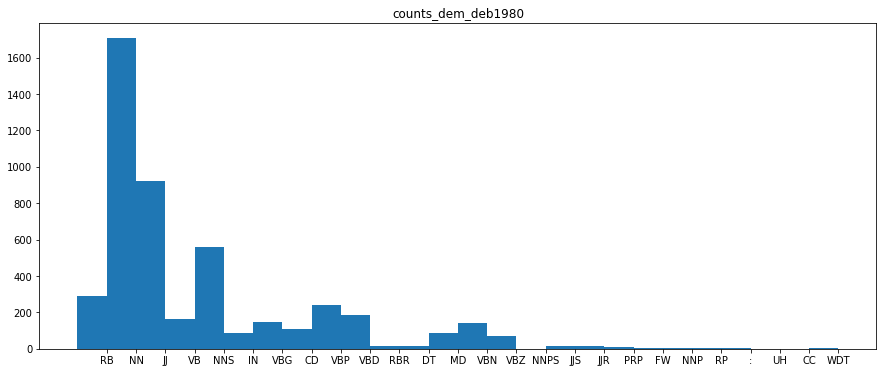

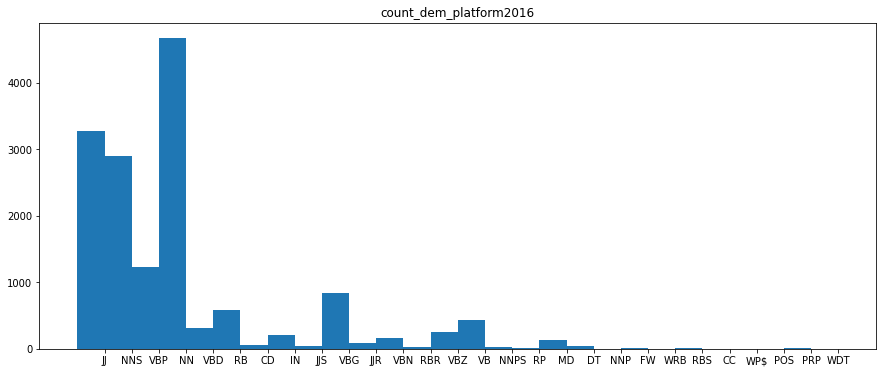

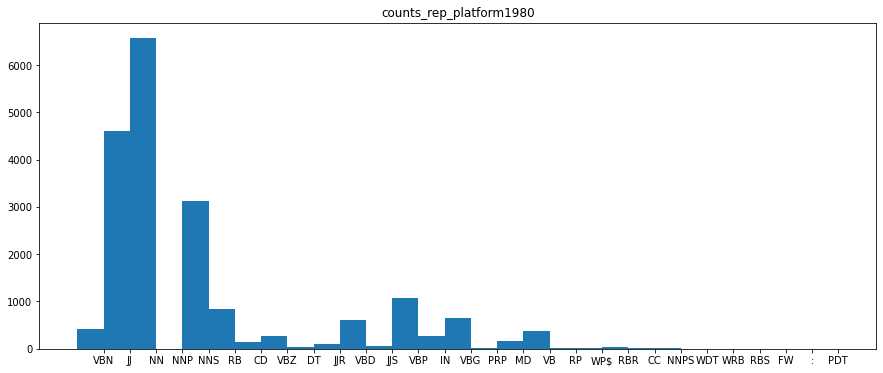

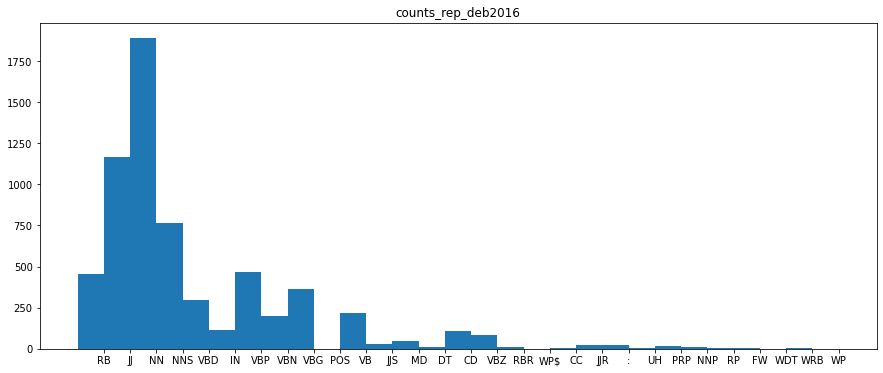

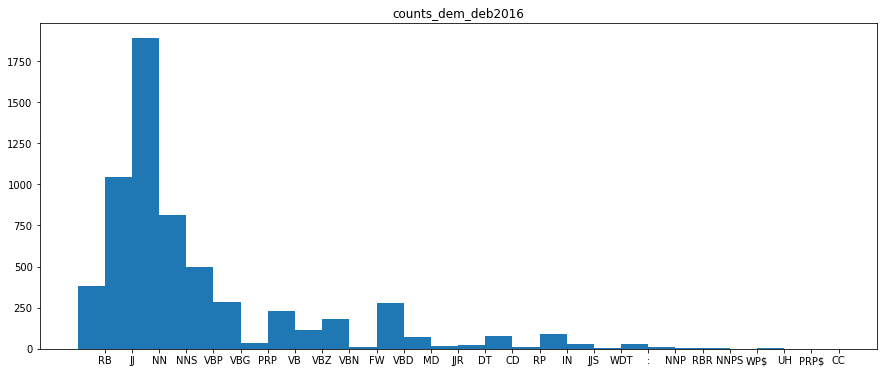

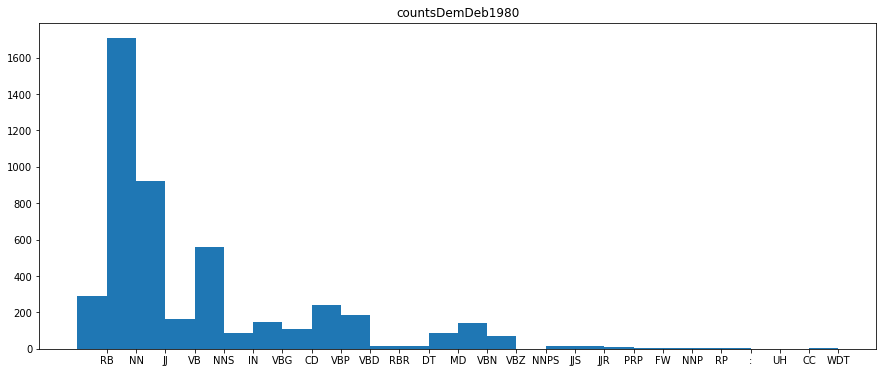

In [119]:
import numpy as np
labels1, values1 = zip(*counts_dem_deb1980.items())
labels2, values2 = zip(*count_dem_platform2016.items())
labels3, values3 = zip(*counts_rep_platform1980.items())
labels4, values4 = zip(*counts_rep_deb2016.items())
labels5, values5 = zip(*counts_dem_deb2016.items())
labels6, values6 = zip(*countsDemDeb1980.items())


indexes1 = np.arange(len(labels1))
indexes2 = np.arange(len(labels2))
indexes3 = np.arange(len(labels3))
indexes4 = np.arange(len(labels4))
indexes5 = np.arange(len(labels5))
indexes6 = np.arange(len(labels6))


width = 1

#fig, ax = plt.subplots(figsize=(10, 6))
#plt.barh(top_terms, top_term_counts)
#plt.gca().invert_yaxis()
#ax.set_xlabel('frequency')
#ax.set_ylabel('terms')
#ax.set_title('Most Frequently Used Words')
#plt.show()
#fig, ax = plt.subplots(figsize=(10, 6))
plt.figure(figsize=(15, 6))
plt.bar(indexes1, values1, width)
plt.xticks(indexes1 + width * 0.5, labels1)
plt.title("counts_dem_deb1980")
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(indexes2, values2, width)
plt.xticks(indexes2 + width * 0.5, labels2)
plt.title("count_dem_platform2016")
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(indexes3, values3, width)
plt.xticks(indexes3 + width * 0.5, labels3)
plt.title("counts_rep_platform1980")
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(indexes4, values4, width)
plt.xticks(indexes4 + width * 0.5, labels4)
plt.title("counts_rep_deb2016")
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(indexes5, values5, width)
plt.xticks(indexes5 + width * 0.5, labels5)
plt.title("counts_dem_deb2016")
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(indexes6, values6, width)
plt.xticks(indexes6 + width * 0.5, labels6)
plt.title("countsDemDeb1980")
plt.show()



In [120]:
len(nltk.Text(tokens_rep_platform_2016))

20048

In [121]:
counts_dem_deb1980
count_dem_platform2016
counts_rep_platform1980
counts_rep_deb2016
counts_dem_deb2016
countsDemDeb1980

Counter({'RB': 289,
         'NN': 1707,
         'JJ': 920,
         'VB': 162,
         'NNS': 560,
         'IN': 85,
         'VBG': 149,
         'CD': 109,
         'VBP': 242,
         'VBD': 184,
         'RBR': 13,
         'DT': 13,
         'MD': 89,
         'VBN': 142,
         'VBZ': 68,
         'NNPS': 1,
         'JJS': 14,
         'JJR': 18,
         'PRP': 12,
         'FW': 2,
         'NNP': 4,
         'RP': 2,
         ':': 2,
         'UH': 1,
         'CC': 1,
         'WDT': 3})

In [122]:
deb2016 = Counter()
plat2016 = Counter()
dem2016vs1980 = Counter()


def compare_tokens_in_texts_with_ratio(counter_a, counter_b, tokenized_a, tokenized_b):
    ratio = len(tokenized_a) / len(tokenized_b)
    
    return_counter = Counter()
    for ele in counter_a:
        if (counter_a[ele]):
            return_counter.update(((ele,counter_b[ele] / counter_a[ele]/ ratio) ))
    return return_counter  

In [123]:

dep_2016_counter = compare_tokens_in_texts_with_ratio(counts_dem_deb2016, counts_rep_deb2016, tokens_dem_debate_2016, tokens_rep_debate_2016)
platform_2016_counter = compare_tokens_in_texts_with_ratio(counts_rep_platform2016, count_dem_platform2016, tokens_dem_platform_2016, tokens_rep_platform_2016)
dep_2016_1980_counter = compare_tokens_in_texts_with_ratio(counts_dem_deb2016, counts_dem_deb1980,tokens_dem_debate_2016,tokens_dem_debate_1980)

In [124]:
for ele in dep_2016_counter:
    print(ele)

RB
1.2284002592609355
JJ
1.1506176647342456
NN
1.031316261621269
NNS
0.9702765815253123
VBP
0.9708957129606289
VBG
1.3089783320577644
PRP
0.4375281109908414
VB
0.9949703140751449
VBZ
0.741823977657404
VBN
1.109785977179409
FW
0.5729534786784828
VBD
MD
0.6827023140309809
JJR
1.2375795139455228
DT
0.6094141545943862
CD
1.42295534831289
RP
0.6562921664862621
IN
1.321011840728367
JJS
1.1024415210434253
WDT
0.2062632523242538
:
0.8471526434746137
NNP
0.8438042140537656
RBR
1.9153016287252138
NNPS
0.0
WP$
UH
2.5782906540531725
PRP$
CC
4.125265046485076


In [125]:
for ele in platform_2016_counter:
    print(ele)

JJ
0.9528838945311806
NN
0.9231027259229664
VBP
1.2984670472346944
NNS
1.10834436880125
IN
0.8677086489280177
RB
0.9911261967249346
VBD
0.6955525868858004
VBG
1.3640428390213077
VBN
0.5038730465117448
MD
0.9149694685864064
VB
1.3604572255817111
JJS
1.009398135798938
VBZ
0.9309379380824443
DT
1.0674643800174741
PRP
0.5146703260798536
JJR
1.5466103233207722
RBR
1.4148755146049794
RBS
3.275174802326341
RP
2.1288636215121217
NNPS
3.9302097627916095
NNP
0.6550349604652682
CD
WRB
0.43668997364351214
CC
FW
1.0189432718348617
WDT
0.13100699209305366
WP$
0.374305691694439
POS
WP
0.0


In [126]:
for ele in dep_2016_1980_counter:
    print(ele)

RB
0.5913164665706251
JJ
0.687450822747327
NN
0.7062965037479302
NNS
0.5397003081709032
VBP
0.38211638485655774
VBG
0.4071980865326159
PRP
0.28421879865363797
VB
0.5577950431726684
VBZ
0.4662185556862307
VBN
0.6031926134469872
FW
0.17368926584388986
VBD
0.5210677975316697
MD
0.9797542390208155
JJR
0.7034415266677541
DT
0.46185554781216176
CD
1.0784124670433923
RP
0.14210939932681899
IN
0.7464735301717739
JJS
0.37732495683327805
WDT
0.46896101777850263
:
0.055828692592678884
NNP
RBR
1.4515460074096511
NNPS
0.3908008481487522
WP$
0.0
UH
PRP$
CC
0.7816016962975044


## SENTIMENT ANALYSIS SPEAKING ABOUT NOUNS (and vocabulary used for sentiment expression):

### Handling imports:

In [127]:
! pip install afinn
! pip install pandas
#! pip install colorama
! pip install seaborn

from afinn import Afinn
import pandas as pd
from nltk import pos_tag
#import colorama
#colorama.init(autoreset = True)

### Defining functions:

In [128]:
def getNounTokens(tokens_given):
    acceptedTokens=[]
    posTaggedTokens=pos_tag(tokens_given)
    #for now, only nouns
    listAcceptablePosTags=['NN','NNP','NNPS','NNS'] #removed 'VB' for now at least.
    for x in posTaggedTokens:
        if(x[1] in listAcceptablePosTags):
            acceptedTokens.append(x[0])
    return acceptedTokens


In [129]:
def getTokenScoreSentimentDataframe(_tokens):
    #Filtering tokens to only have nouns.
    tokens=getNounTokens(_tokens)
    
    #Using Affin for sentiment analysis:
    afn = Afinn()
    scores = [afn.score(token) for token in tokens]
    sentiments = ['positive' if score > 0
                            else 'negative' if score < 0
                                else 'neutral'
                                    for score in scores]
    df = pd.DataFrame()
    df['token'] =  tokens
    df['score'] = scores
    df['sentiment'] = sentiments
    #print(df.head)
    return df


In [130]:
def getAndPrintAverageScoreAndPrintStats(df):
    print(f"Maximal score: {df['score'].max(axis=0)}")
    avg=df.sum(axis=0)['score']/df.count()['score']
    print(f"Average score: {avg}")
    print(f"Minimal score: {df['score'].min(axis=0)}")
    sumScore=df['score'].sum(axis=0)
    print(f"Cumulative score: {sumScore}")
    return [avg,sumScore]

In [131]:
def printVariousAnalytics(df):
    print("Count of tokens of each type:")
    print(df.groupby(['sentiment'])['score'].count().reset_index(name='count'))
    print()
    print("Breakdown of cumulative scores:")
    sentimentSumTable=df.groupby(['sentiment'])['score'].sum().reset_index(name='sum');
    print(sentimentSumTable)
    print()
    ratioNeg2PosSum=(abs(sentimentSumTable['sum'][0]/sentimentSumTable['sum'][2]))
    print(f"Ratio of sum of negative to positive (-/+) scores: {ratioNeg2PosSum}")
    print()
    print("Sentiment frequency breakdown:")
    sentimentCountTable= df.groupby(['sentiment'])['sentiment'].count().reset_index(name='count') #df.groupby(['sentiment']).size().reset_index
    totalSentimentCount=df['sentiment'].size #totalSentimentCount=df['sentiment'].count()
    print(f"Note that total sentimental tokens count is {totalSentimentCount}")
    # for x in sentimentCountTable:
    #     print(f"{x['sentiment']}: {x['counts' in range(0,2)

    for i in range(0,3):
        print(f"{sentimentCountTable['sentiment'][i]}: {sentimentCountTable['count'][i]/totalSentimentCount}")
    ratioNeg2PosCount=sentimentCountTable['count'][0]/sentimentCountTable['count'][2]
    print(f"Ratio number of negative to number of positive (-/+) tokens: {ratioNeg2PosCount}")
    # print(f"Negative: {sentimentCountTable['counts'][0]/totalSentimentCount}")
    # print(f"Neutral: {sentimentCountTable['counts'][1]/totalSentimentCount}")
    # print(f"Positive: {sentimentCountTable['counts'][2]/totalSentimentCount}")
    return[ratioNeg2PosSum,ratioNeg2PosCount]

In [132]:
def showcaseDataframeObtained(df):
    print()
    print("First 10 entries of data frame:")
    print(df.head(10))
    print()
    print("Last 10 entries of data frame:")
    print(df.tail(10))
    print()
    print("TOP 10 scored tokens:")
    print(df.sort_values('score',ascending=False).head(10))
    print()
    print("LOWEST 10 scored tokens:")
    print(df.sort_values('score',ascending=True).head(10))
    print()


### Analyzing Republican Platform 1980:

In [133]:
df=getTokenScoreSentimentDataframe(tokens_rep_platform_1980)
# #Printing first 10 entries of obtained dataframe:
# print(df.head(10))
#Showcasing the data used:
showcaseDataframeObtained(df)


First 10 entries of data frame:
        token  score sentiment
0  convention    0.0   neutral
1        july    0.0   neutral
2     detroit    0.0   neutral
3        mich    0.0   neutral
4       party    0.0   neutral
5    convenes    0.0   neutral
6    presents    0.0   neutral
7     selects    0.0   neutral
8        time    0.0   neutral
9      crisis   -3.0  negative

Last 10 entries of data frame:
            token  score sentiment
9701      defense    0.0   neutral
9702       access    0.0   neutral
9703    resources    0.0   neutral
9704      promote    1.0  positive
9705      defense    0.0   neutral
9706  cooperation    0.0   neutral
9707       assure    0.0   neutral
9708   protection    0.0   neutral
9709      threats   -2.0  negative
9710    resources    0.0   neutral

TOP 10 scored tokens:
           token  score sentiment
1578     supreme    4.0  positive
5049  excellence    3.0  positive
1112    vitality    3.0  positive
6331        love    3.0  positive
156   prosperity

In [134]:
print()
listAvgSum_RepPlat1980=[]
listAvgSum_RepPlat1980=getAndPrintAverageScoreAndPrintStats(df)
avg=listAvgSum_RepPlat1980[0]
print()
print("Words with a score more negative than average:")
print(df.query(f'score<{avg}'))
print("Words with a score more positive than average:")
print(df.query(f'score>{avg}'))
print("Words with a score same as the average:")
print(df.query(f'score=={avg}'))



Maximal score: 4.0
Average score: 0.033158274122129544
Minimal score: -4.0
Cumulative score: 322.0

Words with a score more negative than average:
            token  score sentiment
0      convention    0.0   neutral
1            july    0.0   neutral
2         detroit    0.0   neutral
3            mich    0.0   neutral
4           party    0.0   neutral
...           ...    ...       ...
9706  cooperation    0.0   neutral
9707       assure    0.0   neutral
9708   protection    0.0   neutral
9709      threats   -2.0  negative
9710    resources    0.0   neutral

[8929 rows x 3 columns]
Words with a score more positive than average:
            token  score sentiment
53       vitality    3.0  positive
114    leadership    1.0  positive
117    confidence    2.0  positive
127        growth    2.0  positive
134       promise    1.0  positive
...           ...    ...       ...
9673  exploration    1.0  positive
9684    abilities    2.0  positive
9685     interest    1.0  positive
9700     i

In [135]:
#Printing scores:
listRatioScoreCount_RepPlat1980=[]
listRatioScoreCount_RepPlat1980=printVariousAnalytics(df)
# df1.groupby(['sentiments'])['scores'].sum().reset_index()
# df1.groupby(['sentiments'])['scores'].sum().reset_index()['scores']
# df1.groupby(['sentiments'])['scores'].count().reset_index()['scores']

Count of tokens of each type:
  sentiment  count
0  negative    515
1   neutral   8414
2  positive    782

Breakdown of cumulative scores:
  sentiment     sum
0  negative  -990.0
1   neutral     0.0
2  positive  1312.0

Ratio of sum of negative to positive (-/+) scores: 0.7545731707317073

Sentiment frequency breakdown:
Note that total sentimental tokens count is 9711
negative: 0.053032643394089175
neutral: 0.8664401194521676
positive: 0.08052723715374317
Ratio number of negative to number of positive (-/+) tokens: 0.6585677749360613


### Analyzing Democrat Platform 1980 :

In [136]:
df=getTokenScoreSentimentDataframe(tokens_dem_platform_1980)
#Showcasing the data we have:
showcaseDataframeObtained(df)


First 10 entries of data frame:
        token  score sentiment
0     century    0.0   neutral
1     america    0.0   neutral
2  challenges    0.0   neutral
3      decade    0.0   neutral
4     america    0.0   neutral
5      enters    0.0   neutral
6   decisions    0.0   neutral
7         war   -2.0  negative
8       world    0.0   neutral
9        wars    0.0   neutral

Last 10 entries of data frame:
           token  score sentiment
10894       home    0.0   neutral
10895  restoring    1.0  positive
10896    america    0.0   neutral
10897      place    0.0   neutral
10898     nation    0.0   neutral
10899      world    0.0   neutral
10900     nation    0.0   neutral
10901   champion    2.0  positive
10902    justice    2.0  positive
10903    freedom    2.0  positive

TOP 10 scored tokens:
           token  score sentiment
8899      winner    4.0  positive
645   prosperity    3.0  positive
9834  prosperity    3.0  positive
419     vitality    3.0  positive
3738  excellence    3.0  po

In [137]:
print()
listAvgSum_DemPlat1980=[]
listAvgSum_DemPlat1980=getAndPrintAverageScoreAndPrintStats(df)
avg=listAvgSum_DemPlat1980[0]
print()
print("Words with a score more negative than average:")
print(df.query(f'score<{avg}'))
print("Words with a score more positive than average:")
print(df.query(f'score>{avg}'))
print("Words with a score same as the average:")
print(df.query(f'score=={avg}'))


Maximal score: 4.0
Average score: 0.07492663242846662
Minimal score: -4.0
Cumulative score: 817.0

Words with a score more negative than average:
            token  score sentiment
0         century    0.0   neutral
1         america    0.0   neutral
2      challenges    0.0   neutral
3          decade    0.0   neutral
4         america    0.0   neutral
...           ...    ...       ...
10896     america    0.0   neutral
10897       place    0.0   neutral
10898      nation    0.0   neutral
10899       world    0.0   neutral
10900      nation    0.0   neutral

[9938 rows x 3 columns]
Words with a score more positive than average:
             token  score sentiment
17      confidence    2.0  positive
18            hope    2.0  positive
41     exploration    1.0  positive
43          spirit    1.0  positive
48      dedication    2.0  positive
...            ...    ...       ...
10885     strength    2.0  positive
10895    restoring    1.0  positive
10901     champion    2.0  positive
1

In [138]:
#Printing scores:
listRatioScoreCount_DemPlat1980=[]
listRatioScoreCount_DemPlat1980=printVariousAnalytics(df)

Count of tokens of each type:
  sentiment  count
0  negative    448
1   neutral   9490
2  positive    966

Breakdown of cumulative scores:
  sentiment     sum
0  negative  -855.0
1   neutral     0.0
2  positive  1672.0

Ratio of sum of negative to positive (-/+) scores: 0.5113636363636364

Sentiment frequency breakdown:
Note that total sentimental tokens count is 10904
negative: 0.041085840058694055
neutral: 0.8703228173147469
positive: 0.08859134262655906
Ratio number of negative to number of positive (-/+) tokens: 0.463768115942029


### What we have seen so far (Analysis 1):
So far, we can see the Republicans used more negative vernacular/portrayed a slightly more negative outlook than the Democrats in the platforms. However, the discourse remains mostly positive overall. Both in ratio of intensity (negativescore/positivescore) and quantity (negativewordcount/positivewordcount).

### Analyzing Republican debate from 1980:

In [139]:
df=getTokenScoreSentimentDataframe(tokens_rep_debate_1980)
#Showcasing the data we have:
showcaseDataframeObtained(df)


First 10 entries of data frame:
         token  score sentiment
0         know    0.0   neutral
1  differences    0.0   neutral
2     policies    0.0   neutral
3          i'm    0.0   neutral
4         tell    0.0   neutral
5        heart    0.0   neutral
6     priority    0.0   neutral
7        world    0.0   neutral
8        peace    2.0  positive
9          use    0.0   neutral

Last 10 entries of data frame:
         token  score sentiment
2069  problems   -2.0  negative
2070    people    0.0   neutral
2071   country    0.0   neutral
2072     world    0.0   neutral
2073      meet    0.0   neutral
2074   destiny    0.0   neutral
2075     build    0.0   neutral
2076      land    0.0   neutral
2077      city    0.0   neutral
2078      hill    0.0   neutral

TOP 10 scored tokens:
           token  score sentiment
2001        love    3.0  positive
1472     benefit    2.0  positive
163       growth    2.0  positive
1600        kind    2.0  positive
1788  confidence    2.0  positive
1021

In [140]:
print()
listAvgSum_RepDeb1980=[]
listAvgSum_RepDeb1980=getAndPrintAverageScoreAndPrintStats(df)
avg=listAvgSum_RepDeb1980[0]
print()
print("Words with a score more negative than average:")
print(df.query(f'score<{avg}'))
print("Words with a score more positive than average:")
print(df.query(f'score>{avg}'))
print("Words with a score same as the average:")
print(df.query(f'score=={avg}'))


Maximal score: 3.0
Average score: -0.01443001443001443
Minimal score: -4.0
Cumulative score: -30.0

Words with a score more negative than average:
         token  score sentiment
25      burden   -2.0  negative
30         war   -2.0  negative
31         war   -2.0  negative
40      crisis   -3.0  negative
45      crisis   -3.0  negative
...        ...    ...       ...
1978  failures   -2.0  negative
2019      fire   -2.0  negative
2034  problems   -2.0  negative
2038   retreat   -1.0  negative
2069  problems   -2.0  negative

[108 rows x 3 columns]
Words with a score more positive than average:
            token  score sentiment
0            know    0.0   neutral
1     differences    0.0   neutral
2        policies    0.0   neutral
3             i'm    0.0   neutral
4            tell    0.0   neutral
...           ...    ...       ...
2074      destiny    0.0   neutral
2075        build    0.0   neutral
2076         land    0.0   neutral
2077         city    0.0   neutral
2078        

In [141]:
#Printing scores:
listRatioScoreCount_RepDeb1980=[]
listRatioScoreCount_RepDeb1980=printVariousAnalytics(df)

Count of tokens of each type:
  sentiment  count
0  negative    108
1   neutral   1852
2  positive    119

Breakdown of cumulative scores:
  sentiment    sum
0  negative -203.0
1   neutral    0.0
2  positive  173.0

Ratio of sum of negative to positive (-/+) scores: 1.1734104046242775

Sentiment frequency breakdown:
Note that total sentimental tokens count is 2079
negative: 0.05194805194805195
neutral: 0.8908128908128908
positive: 0.05723905723905724
Ratio number of negative to number of positive (-/+) tokens: 0.907563025210084


### Analyzing Democrat debate from 1980:

In [142]:
df=getTokenScoreSentimentDataframe(tokens_dem_debate_1980)
#Showcasing the data we have:
showcaseDataframeObtained(df)


First 10 entries of data frame:
       token  score sentiment
0         mr    0.0   neutral
1      stone    0.0   neutral
2  thousands    0.0   neutral
3  decisions    0.0   neutral
4       i've    0.0   neutral
5  president    0.0   neutral
6     office    0.0   neutral
7  decisions    0.0   neutral
8    country    0.0   neutral
9        man    0.0   neutral

Last 10 entries of data frame:
           token  score sentiment
2262    campaign    0.0   neutral
2263      people    0.0   neutral
2264  government    0.0   neutral
2265        john    0.0   neutral
2266    anderson    0.0   neutral
2267       lucey    0.0   neutral
2268        kind    2.0  positive
2269   coalition    0.0   neutral
2270  government    0.0   neutral
2271    problems   -2.0  negative

TOP 10 scored tokens:
            token  score sentiment
2230      victory    3.0  positive
749    commitment    2.0  positive
1028  opportunity    2.0  positive
1622      respect    2.0  positive
1865         kind    2.0  positiv

In [143]:
print()
listAvgSum_DemDeb1980=[]
listAvgSum_DemDeb1980=getAndPrintAverageScoreAndPrintStats(df)
avg=listAvgSum_DemDeb1980[0]
print()
print("Words with a score more negative than average:")
print(df.query(f'score<{avg}'))
print("Words with a score more positive than average:")
print(df.query(f'score>{avg}'))
print("Words with a score same as the average:")
print(df.query(f'score=={avg}'))


Maximal score: 3.0
Average score: 0.03697183098591549
Minimal score: -3.0
Cumulative score: 84.0

Words with a score more negative than average:
           token  score sentiment
0             mr    0.0   neutral
1          stone    0.0   neutral
2      thousands    0.0   neutral
3      decisions    0.0   neutral
4           i've    0.0   neutral
...          ...    ...       ...
2266    anderson    0.0   neutral
2267       lucey    0.0   neutral
2269   coalition    0.0   neutral
2270  government    0.0   neutral
2271    problems   -2.0  negative

[2133 rows x 3 columns]
Words with a score more positive than average:
            token  score sentiment
25       strength    2.0  positive
34       increase    1.0  positive
35     commitment    2.0  positive
40       strength    2.0  positive
42          peace    2.0  positive
...           ...    ...       ...
2230      victory    3.0  positive
2237      resolve    2.0  positive
2244         kind    2.0  positive
2247  recognition    2.0

In [144]:
#Printing scores:
listRatioScoreCount_DemDeb1980=[]
listRatioScoreCount_DemDeb1980=printVariousAnalytics(df)

Count of tokens of each type:
  sentiment  count
0  negative     88
1   neutral   2045
2  positive    139

Breakdown of cumulative scores:
  sentiment    sum
0  negative -152.0
1   neutral    0.0
2  positive  236.0

Ratio of sum of negative to positive (-/+) scores: 0.6440677966101694

Sentiment frequency breakdown:
Note that total sentimental tokens count is 2272
negative: 0.03873239436619718
neutral: 0.9000880281690141
positive: 0.061179577464788734
Ratio number of negative to number of positive (-/+) tokens: 0.6330935251798561


### What we have seen so far (Analysis 2):
What we see here is almost akin to an exaggerated situation of Analysis 1 in some aspects. First thing we notice is Republican is significantly more negative in the debate than in the platform (as one might expect), however, the Democratic party has similar sentimental aspects to their vernacular as to what they had in the platform (as one might NOT have expected). Consequently, we see that the Republicans are slightly more negative than they are positive when it comes to the intensity (score). Meanwhile, Democrats have a similar ratio of scores and ratio of number of words of each type.

### Analyzing Republican debate from 2016:

In [145]:
df=getTokenScoreSentimentDataframe(tokens_rep_debate_2016)
#Showcasing the data we have:
showcaseDataframeObtained(df)


First 10 entries of data frame:
        token  score sentiment
0       thank    2.0  positive
1   everybody    0.0   neutral
2       court    0.0   neutral
3     country    0.0   neutral
4    justices    0.0   neutral
5   something    0.0   neutral
6     justice    2.0  positive
7    ginsburg    0.0   neutral
8  statements    0.0   neutral
9      number    0.0   neutral

Last 10 entries of data frame:
         token  score sentiment
2651      quit    0.0   neutral
2652   respect    2.0  positive
2653      tell    0.0   neutral
2654   fighter    0.0   neutral
2655  fighting   -2.0  negative
2656  judgment    0.0   neutral
2657     cases    0.0   neutral
2658      quit    0.0   neutral
2659  consider    0.0   neutral
2660     trait    0.0   neutral

TOP 10 scored tokens:
                token  score sentiment
1461           winner    4.0  positive
901            winner    4.0  positive
22                win    4.0  positive
950            winner    4.0  positive
1513              win   

In [146]:
print()
listAvgSum_RepDeb2016=[]
listAvgSum_RepDeb2016=getAndPrintAverageScoreAndPrintStats(df)
avg=listAvgSum_RepDeb2016[0]
print()
print("Words with a score more negative than average:")
print(df.query(f'score<{avg}'))
print("Words with a score more positive than average:")
print(df.query(f'score>{avg}'))
print("Words with a score same as the average:")
print(df.query(f'score=={avg}'))


Maximal score: 4.0
Average score: -0.013528748590755355
Minimal score: -4.0
Cumulative score: -36.0

Words with a score more negative than average:
            token  score sentiment
28         trauma   -3.0  negative
59            gun   -1.0  negative
62       violence   -3.0  negative
65            gun   -1.0  negative
66       violence   -3.0  negative
...           ...    ...       ...
2608          pay   -1.0  negative
2627  restrictive   -1.0  negative
2640     disgrace   -2.0  negative
2642     disgrace   -2.0  negative
2655     fighting   -2.0  negative

[143 rows x 3 columns]
Words with a score more positive than average:
          token  score sentiment
0         thank    2.0  positive
1     everybody    0.0   neutral
2         court    0.0   neutral
3       country    0.0   neutral
4      justices    0.0   neutral
...         ...    ...       ...
2656   judgment    0.0   neutral
2657      cases    0.0   neutral
2658       quit    0.0   neutral
2659   consider    0.0   neutr

In [147]:
#Printing scores:
listRatioScoreCount_RepDeb2016=[]
listRatioScoreCount_RepDeb2016=printVariousAnalytics(df)

Count of tokens of each type:
  sentiment  count
0  negative    143
1   neutral   2387
2  positive    131

Breakdown of cumulative scores:
  sentiment    sum
0  negative -286.0
1   neutral    0.0
2  positive  250.0

Ratio of sum of negative to positive (-/+) scores: 1.144

Sentiment frequency breakdown:
Note that total sentimental tokens count is 2661
negative: 0.053739195791055995
neutral: 0.8970311912814731
positive: 0.04922961292747088
Ratio number of negative to number of positive (-/+) tokens: 1.0916030534351144


### Analyzing Democrat debate from 2016:

In [148]:
df=getTokenScoreSentimentDataframe(tokens_dem_debate_2016)
#Showcasing the data we have:
showcaseDataframeObtained(df)


First 10 entries of data frame:
           token  score sentiment
0          chris    0.0   neutral
1         thanks    2.0  positive
2          court    0.0   neutral
3          issue    0.0   neutral
4       election    0.0   neutral
5           kind    2.0  positive
6        country    0.0   neutral
7           kind    2.0  positive
8  opportunities    2.0  positive
9       citizens    0.0   neutral

Last 10 entries of data frame:
           token  score sentiment
2703   president    0.0   neutral
2704      that's    0.0   neutral
2705      people    0.0   neutral
2706       years    0.0   neutral
2707        help    2.0  positive
2708        kids    0.0   neutral
2709    families    0.0   neutral
2710  experience    0.0   neutral
2711       house    0.0   neutral
2712         day    0.0   neutral

TOP 10 scored tokens:
          token  score sentiment
2694    supreme    4.0  positive
2499     wealth    3.0  positive
1548  celebrate    3.0  positive
2312       hope    2.0  positive

In [149]:
print()
listAvgSum_DemDeb2016=[]
listAvgSum_DemDeb2016=getAndPrintAverageScoreAndPrintStats(df)
avg=listAvgSum_DemDeb2016[0]
print()
print("Words with a score more negative than average:")
print(df.query(f'score<{avg}'))
print("Words with a score more positive than average:")
print(df.query(f'score>{avg}'))
print("Words with a score same as the average:")
print(df.query(f'score=={avg}'))


Maximal score: 4.0
Average score: 0.010689273866568375
Minimal score: -4.0
Cumulative score: 29.0

Words with a score more negative than average:
           token  score sentiment
0          chris    0.0   neutral
2          court    0.0   neutral
3          issue    0.0   neutral
4       election    0.0   neutral
6        country    0.0   neutral
...          ...    ...       ...
2708        kids    0.0   neutral
2709    families    0.0   neutral
2710  experience    0.0   neutral
2711       house    0.0   neutral
2712         day    0.0   neutral

[2549 rows x 3 columns]
Words with a score more positive than average:
              token  score sentiment
1            thanks    2.0  positive
5              kind    2.0  positive
7              kind    2.0  positive
8     opportunities    2.0  positive
10             kind    2.0  positive
...             ...    ...       ...
2665           hope    2.0  positive
2671        respect    2.0  positive
2677        respect    2.0  positive
269

In [150]:
#Printing scores:
listRatioScoreCount_DemDeb2016=[]
listRatioScoreCount_DemDeb2016=printVariousAnalytics(df)

Count of tokens of each type:
  sentiment  count
0  negative    140
1   neutral   2409
2  positive    164

Breakdown of cumulative scores:
  sentiment    sum
0  negative -260.0
1   neutral    0.0
2  positive  289.0

Ratio of sum of negative to positive (-/+) scores: 0.8996539792387543

Sentiment frequency breakdown:
Note that total sentimental tokens count is 2713
negative: 0.05160339107998525
neutral: 0.8879469222263178
positive: 0.06044968669369701
Ratio number of negative to number of positive (-/+) tokens: 0.8536585365853658


### What we have seen so far (Analysis 3):
Clearly, Democrats have gotten significantly more negative as compared to their debate in 1980, but not enough to be able to catch up to the Republicans, who have stayed relatively stagnant in their intensity of being negative scores but have increased a fair bit in the ratio of negative words used to ratio of positive words used.

### Some relevant plots:

In [151]:
eventNames=["Platform 1980","Platform 1980", "Debate 1980", "Debate 1980", "Debate 2016", "Debate 2016"]
partyNames=["Republican", "Democratic", "Republican", "Democratic", "Republican", "Democratic"]
averages=[listAvgSum_RepPlat1980[0],listAvgSum_DemPlat1980[0],listAvgSum_RepDeb1980[0],listAvgSum_DemDeb1980[0],listAvgSum_RepDeb2016[0],listAvgSum_DemDeb2016[0]]
sums=[listAvgSum_RepPlat1980[1],listAvgSum_DemPlat1980[1],listAvgSum_RepDeb1980[1],listAvgSum_DemDeb1980[1],listAvgSum_RepDeb2016[1],listAvgSum_DemDeb2016[1]]

ratiosScore=[listRatioScoreCount_RepPlat1980[0],listRatioScoreCount_DemPlat1980[0],listRatioScoreCount_RepDeb1980[0],listRatioScoreCount_DemDeb1980[0],listRatioScoreCount_RepDeb2016[0],listRatioScoreCount_DemDeb2016[0]]
ratiosCount=[listRatioScoreCount_RepPlat1980[1],listRatioScoreCount_DemPlat1980[1],listRatioScoreCount_RepDeb1980[1],listRatioScoreCount_DemDeb1980[1],listRatioScoreCount_RepDeb2016[1],listRatioScoreCount_DemDeb2016[1]]



dataPlot={
    'Party': partyNames,
    'Type': eventNames,
    'AverageScore': averages,
    'SumOfScores': sums,
    'RatioNegative2Positive_ScoreSum':ratiosScore,
    'RatioNegative2Positive_WordCount':ratiosCount
}

dfPlot=pd.DataFrame(dataPlot)
print(dfPlot.groupby("Type").head(20))

        Party           Type  AverageScore  SumOfScores  \
0  Republican  Platform 1980      0.033158        322.0   
1  Democratic  Platform 1980      0.074927        817.0   
2  Republican    Debate 1980     -0.014430        -30.0   
3  Democratic    Debate 1980      0.036972         84.0   
4  Republican    Debate 2016     -0.013529        -36.0   
5  Democratic    Debate 2016      0.010689         29.0   

   RatioNegative2Positive_ScoreSum  RatioNegative2Positive_WordCount  
0                         0.754573                          0.658568  
1                         0.511364                          0.463768  
2                         1.173410                          0.907563  
3                         0.644068                          0.633094  
4                         1.144000                          1.091603  
5                         0.899654                          0.853659  


In [152]:
import seaborn as sns

#### Plot of Average Score of each party for various events
Higher is positive, lower is negative.

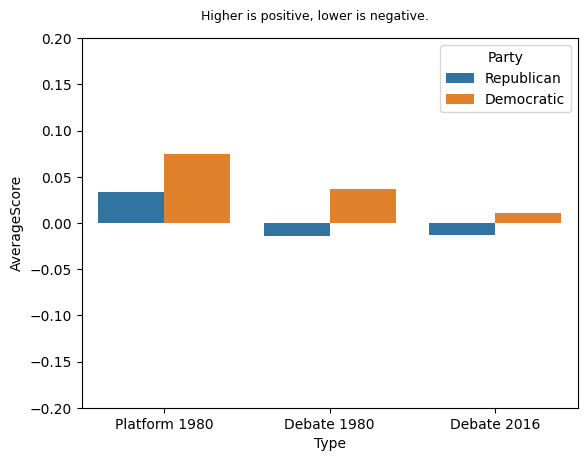

In [153]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fig, axi = plt.subplots()
axi.set_title="Plot of Average Score of each party for various events"
axi.text(0.22, 0.22,'Higher is positive, lower is negative.', fontsize=9) #add text
sns.barplot(y='AverageScore',x='Type',hue='Party',data=dfPlot,ax=axi)
axi.set_ylim(-0.2,0.2)
plt.show()


#### Plot of Sum of Scores of each party for various events
Higher is positive, lower is negative.

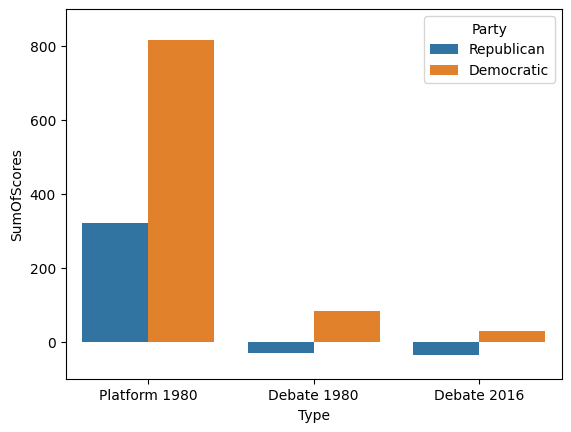

In [154]:
fig, axi = plt.subplots()
axi.set_ylim(-100,900)
sns.barplot(y='SumOfScores',x='Type',hue='Party',data=dfPlot,ax=axi)
plt.show()


#### Plot of Ratio of positive scores of each party to their negative score
Lower is better because lower ratio means more positive score. If the ratio>1, the negative score was greater than positive score and vice-versa.

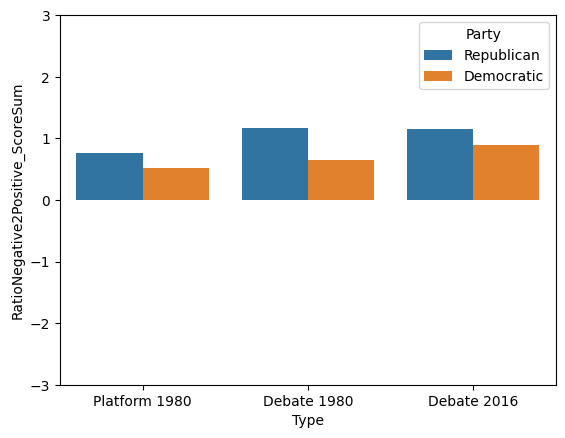

In [155]:
fig, axi = plt.subplots()
axi.set_ylim(-3,3)
sns.barplot(y='RatioNegative2Positive_ScoreSum',x='Type',hue='Party',data=dfPlot,ax=axi)
plt.show()

#### Plot of Ratio of number of positive tokens of each party to the number of their negative tokens.
Lower is better because lower ratio means more positive words were used. If the ratio > 1, the number of negative tokens was greater than positive tokens (and vice-versa).

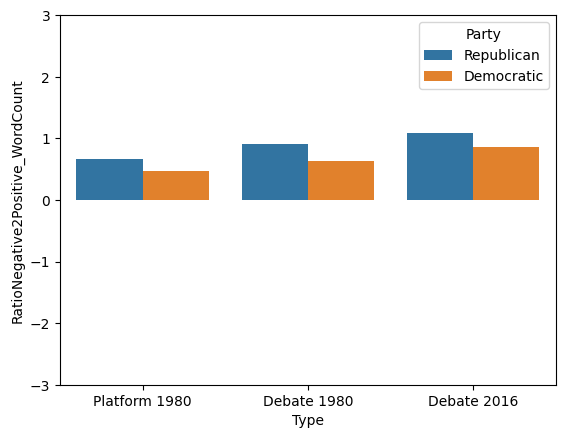

In [156]:
fig, axi = plt.subplots()
axi.set_ylim(-3,3)
sns.barplot(y='RatioNegative2Positive_WordCount',x='Type',hue='Party',data=dfPlot,ax=axi)
plt.show()